# ML model for Lead Scoring using Logistic Regression

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 
To make this process more efficient, the company wishes to identify the most potential leads. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

## Business Goal

To identify the most promising leads, i.e. the leads that are most likely to convert into paying customers. We need to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 

In [1]:
#importing liabrary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Warnnings
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [3]:
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 100)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking for shape of the dataset
lead_df.shape


(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we can see that there are only 7 numerical columns and remaining 30 columns are categorical columns.
- data types look okay

In [6]:
#Describing Data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From above we can observe that the columns namely 'TotalVisits', 'Total Time Spent on Website' & 'Page Views Per Visit' are having outliers, so we need to treat them to make the data clean.

# Data Cleaning and preparation

## Data Cleaning

In [7]:
# DROPPING REDUNDANT COLUMNS -
lead_cl_df = lead_df.drop(columns = ['Prospect ID','Lead Number', 'Last Notable Activity'] , axis=1)

# PROSP ID AND LEAD NUMBER ARE NOT REQUIRD FOR ANALYSIS. lAST NOTABLE ACTIVITY HAS SAME VALUES AS LAST ACTIVITY

In [8]:
# Checking the dataset

lead_cl_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No


In [9]:
lead_cl_df.shape

(9240, 34)

- From above we observe that there are some columns with labels 'Select', which means that the customer didn't select any of the given options, hence it is better to treat them as null values.

In [10]:
# Checking the null values

null_values = round(100*lead_cl_df.isnull().sum() / len(lead_cl_df),2)
null_values[null_values>0]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

Dropping the columns having more than 35% of the null values

In [11]:
# Dropping the columns having more than 35% of the null values

lead_cl_df_drop = lead_cl_df.loc[:, lead_cl_df.isnull().mean() > 0.35]
lead_cl_df_drop_1 = list(lead_cl_df_drop.keys())
lead_cl_df = lead_cl_df.drop(lead_cl_df_drop_1, axis=1)

In [12]:
# Checking the null values
null_values = round(100*lead_cl_df.isnull().sum() / len(lead_cl_df),2)
null_values[null_values>0]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
City                                             15.37
dtype: float64

In [13]:
# Checking the shape

lead_cl_df.shape

(9240, 28)

Checking those columns having less than 35% of null values and imputing there respective values

In [14]:
# Checking the Lead Source col.

lead_cl_df['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

Since 'Google' is having a higher number of occurences so, we will impute the null values with 'Google'.

In [15]:
# Checking the Total Visits col.

lead_cl_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

Since the most occuring value here is '0.0', therefore imputing the missing values with '0.0'.

In [16]:
# Checking the Page Views Per Visit col.

lead_cl_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

Since the most occuring value here is '0.0', therefore imputing the missing values with '0.0'.

In [17]:
# Checking the Last Activity col.

lead_cl_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

Since the most occuring value here is 'Email Opened', therefore imputing the missing values with 'Email Opened'.

In [18]:
# CHECKING % DISTRIBUTION OF 'SPECIALIZATION'  COL.
unique_entries = lead_cl_df['Specialization'].value_counts(dropna=False, normalize=True) * 100
unique_entries

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

- 21% did not select and 15% data is null. So we shall impute both with a new entry - "no_specialization_info"

In [19]:
# CHECKING % DISTRIBUTION OF 'HOW DID YOU HEAR ABOUT X EDUCATION'  COL.
unique_entries = lead_cl_df['How did you hear about X Education'].value_counts(dropna=False, normalize=True) * 100
unique_entries

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

 - 54% leads did not select and 23% null values. Total 77% missing informaiotn.  we shall drop the column

In [20]:
# CHECKING % DISTRIBUTION OF THE WHAT IS YOUR CURRENT OCCUPATION  COL.
unique_entries = lead_cl_df['What is your current occupation'].value_counts(dropna=False, normalize=True) * 100
unique_entries

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

 - 29% NaN values are replaced with "Occupation_status_missing"

In [21]:
# CHECKING % DISTRIBUTION OF What matters most to you in choosing a course  COL.
unique_entries = lead_cl_df['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True) * 100
unique_entries

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

 - NaN values are imputed with "What_matters_most_missing". If we impute with most occuring value, then this column will become redundant.

In [22]:
# CHECKING % DISTRIBUTION OF THE Country  COL.
unique_entries = lead_cl_df['Country'].value_counts(dropna=False, normalize=True) * 100
unique_entries

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [23]:
# CHECKING % DISTRIBUTION OF THE City  COL.
unique_entries = lead_cl_df['City'].value_counts(dropna=False, normalize=True) * 100
unique_entries

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [24]:
# Country and City does not contain useful information, therefore deleting the columns

In [25]:
# CHECKING % DISTRIBUTION OF Lead Profile  COL.
unique_entries = lead_cl_df['Lead Profile'].value_counts(dropna=False, normalize=True) * 100
unique_entries

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

- 45% values are "Select" and 29% values are NaN. Total 74% values missing. So we may choose to delete. However, this colum is an indicator of the intution of the X Education Employee which could be a good indicator in the 26% cases. Therefore, we shall keep this column and impute "Select" and "NaN" with "Lead_Profile_missing"

In [26]:
# DROPPING COLUMNS -
lead_cl_df.drop(columns = ['How did you hear about X Education','Country','City'] , axis=1, inplace = True)

In [27]:
# Now imputing the missing values as per their respective values.

missing_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened',
              'What is your current occupation':'Occupation_status_missing', 
               'What matters most to you in choosing a course':'What_matters_more_missing', 'Specialization': 'no_specialization_info', 'Lead Profile' : 'Lead_Profile_missing'}
lead_cl_df = lead_cl_df.fillna(value = missing_val)


# Now imputing the "Select" as per their respective values.
replace_dict = {'Specialization': {'Select': 'no_specialization_info'}, 'Lead Profile': {'Select': 'Lead_Profile_missing'}}
lead_cl_df.replace(replace_dict, inplace=True)


In [28]:
# Checking the null values once more
null_values = round(100*lead_cl_df.isnull().sum() / len(lead_cl_df),2)
null_values[null_values>0]

Series([], dtype: float64)

#### Now there are no null values present in the dataset.

In [29]:
# Checking the Lead Source column for any spelling mistake

lead_cl_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We found that the 'Google' is being misprinted as 'google' which is making a duplicate in our data and can harm our analysis.
We need to treat it to make it same as 'Google'.

In [30]:
# Treating the misprinted word

lead_cl_df['Lead Source'] = lead_cl_df['Lead Source'].apply(lambda x:x.capitalize())
lead_cl_df['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

In [31]:
# Converting some categorical variables to numerical variables

lead_cl_df['TotalVisits'] = lead_cl_df['TotalVisits'].astype('float64') 
lead_cl_df['Page Views Per Visit'] = lead_cl_df['Page Views Per Visit'].astype('float64')

## Data Visualisation

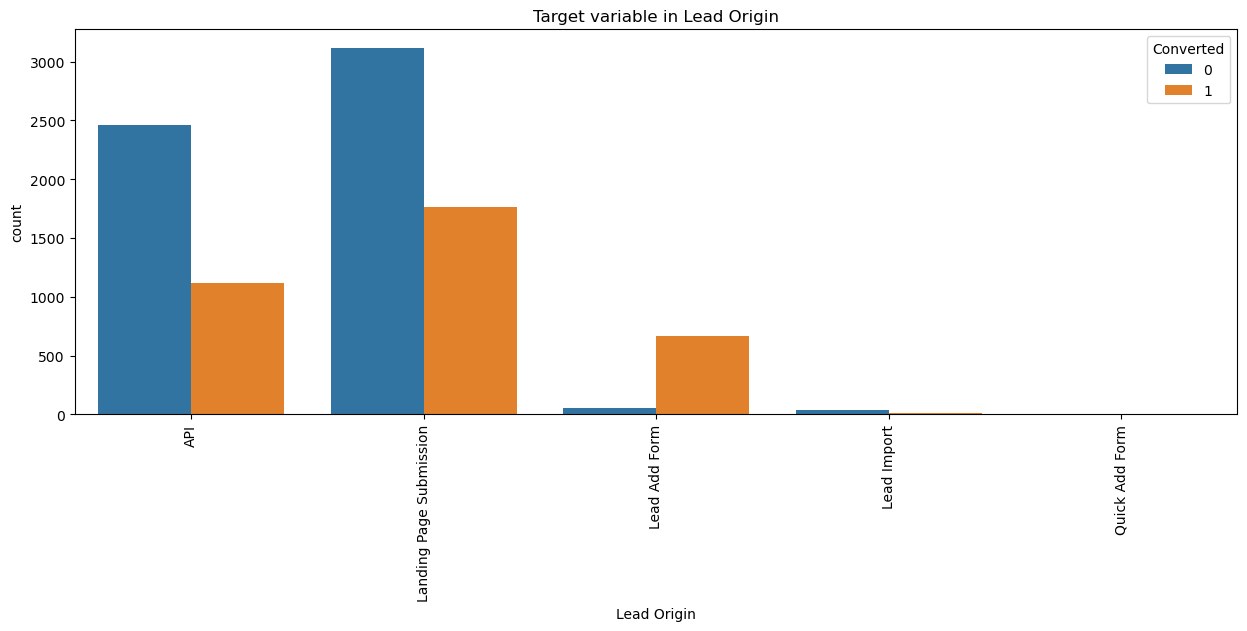

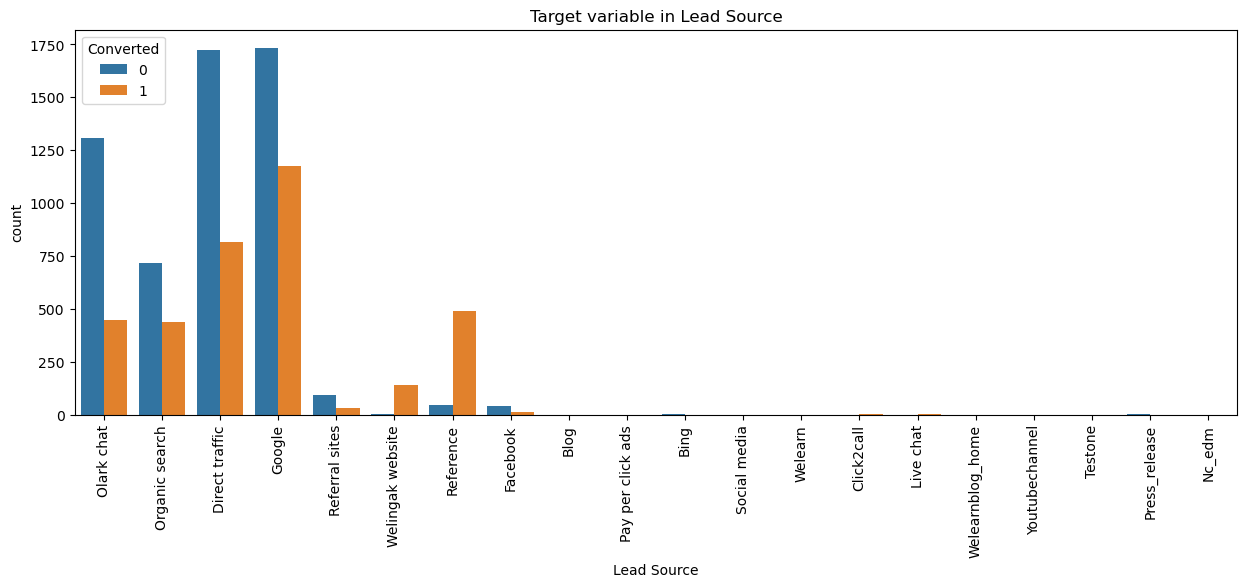

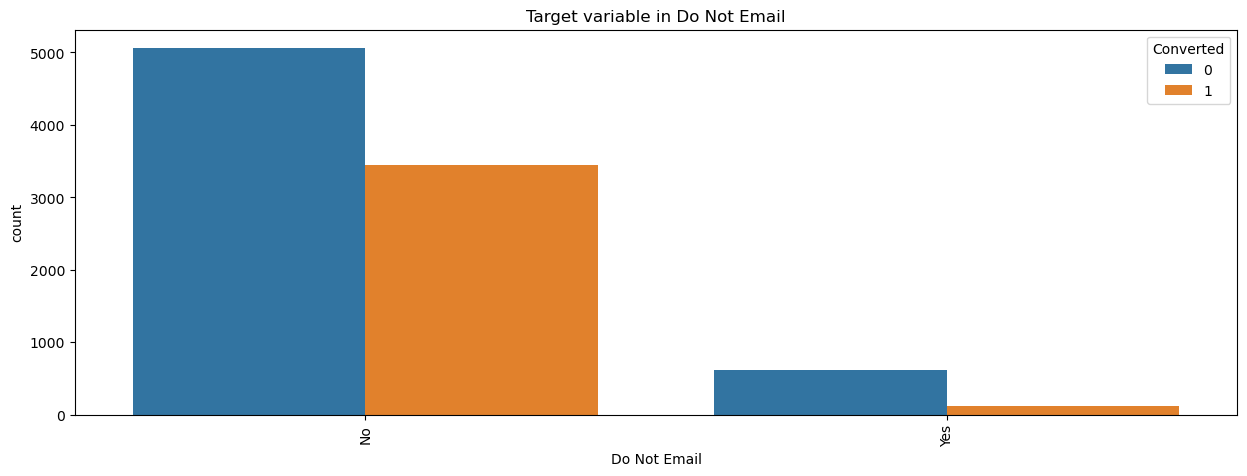

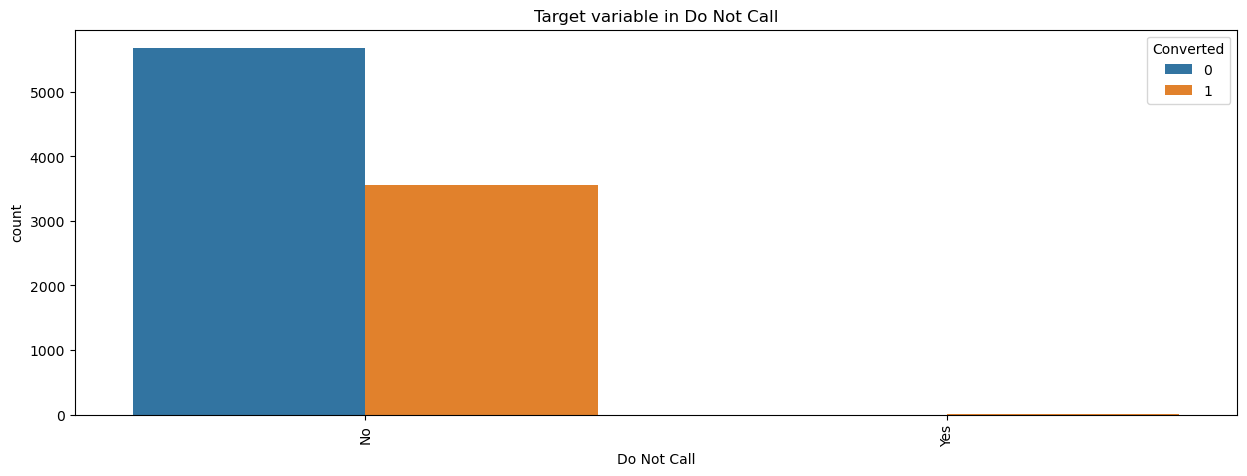

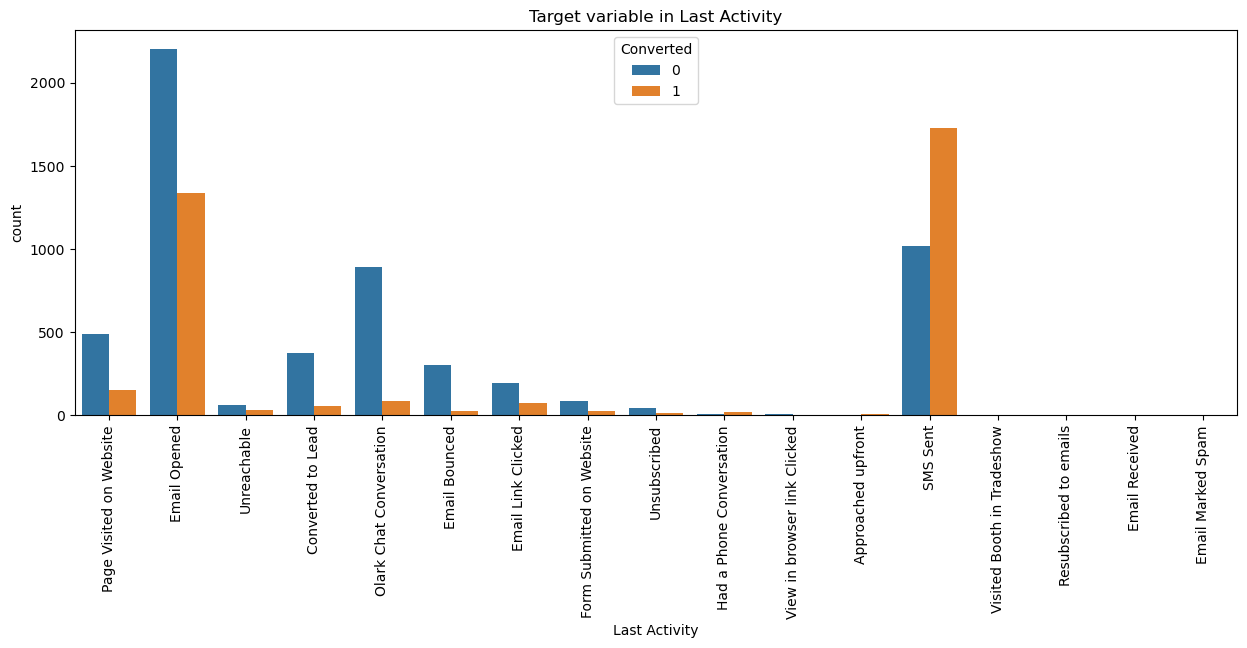

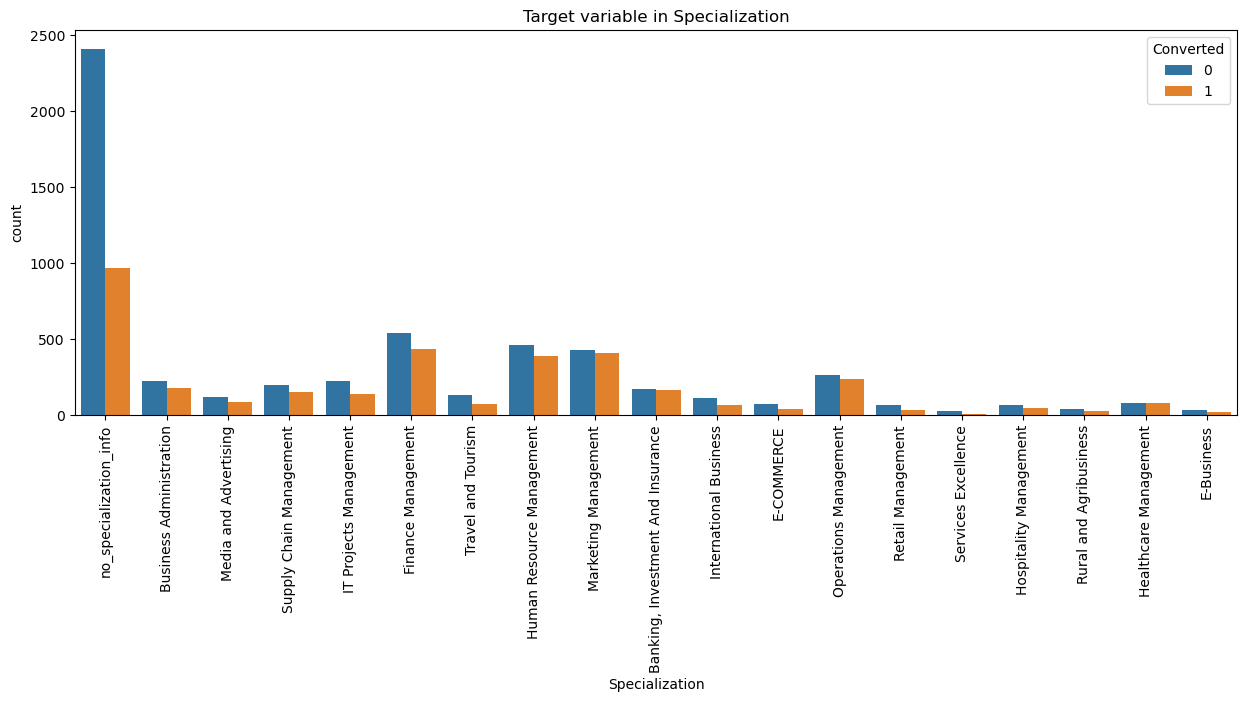

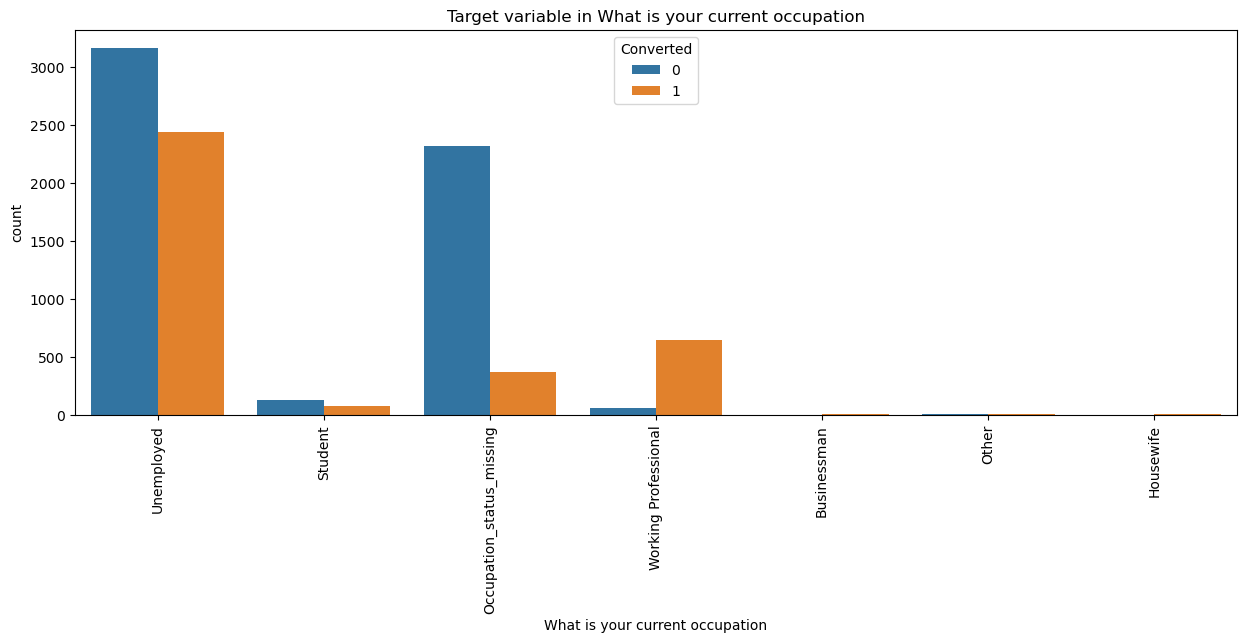

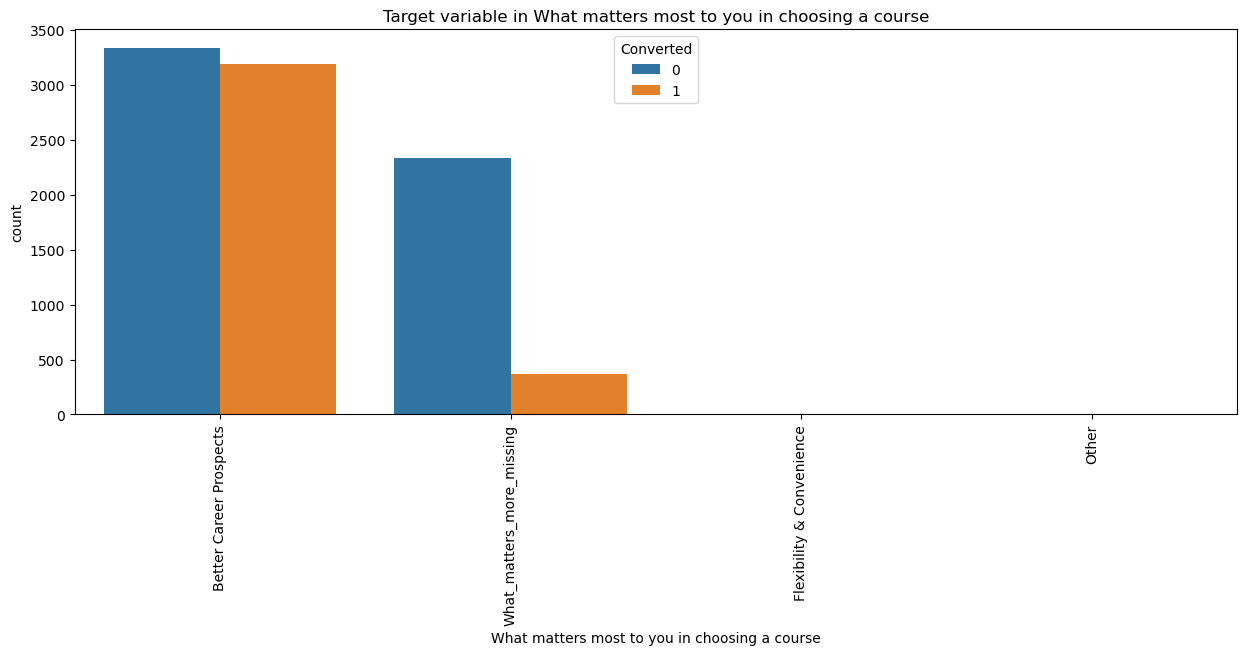

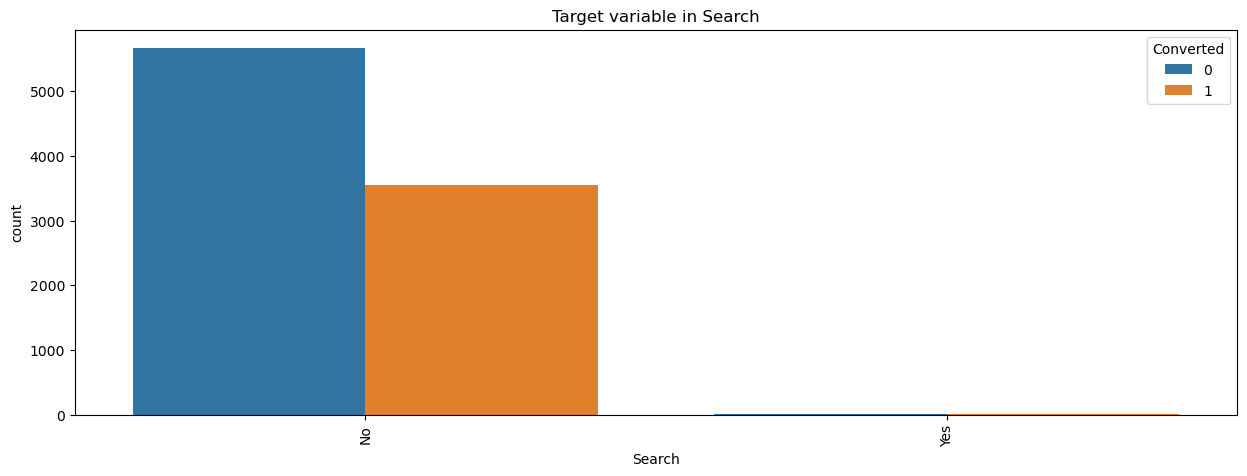

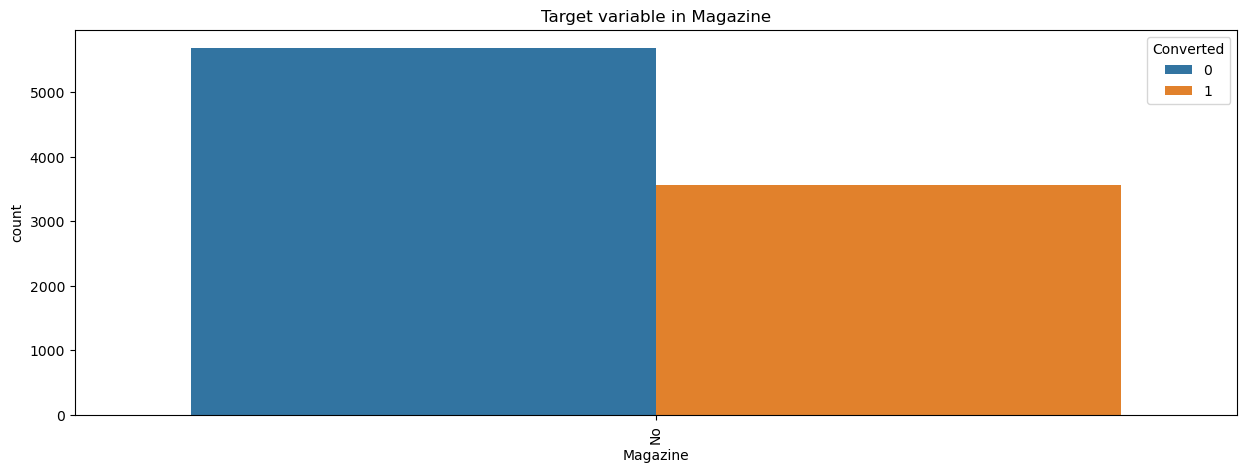

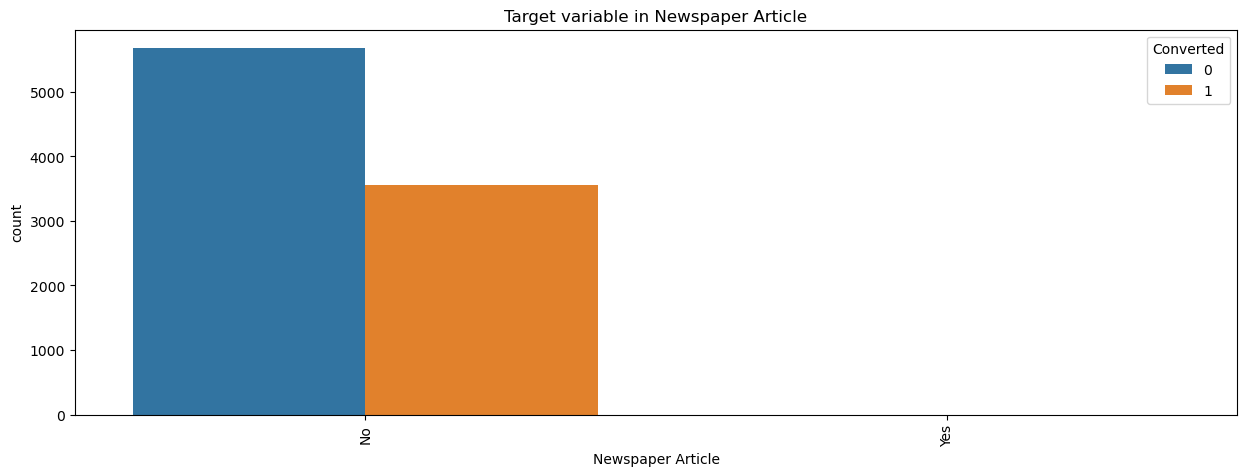

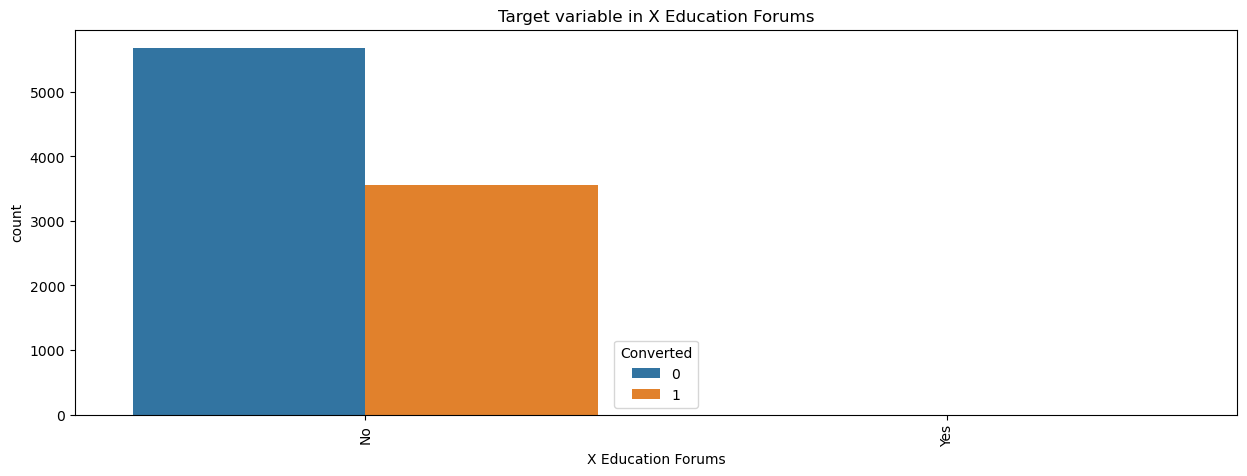

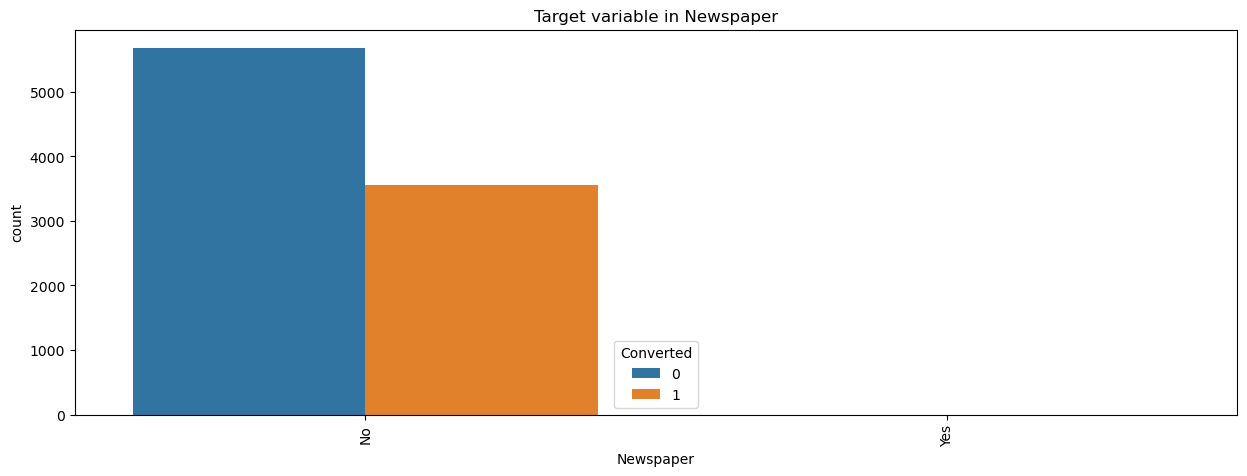

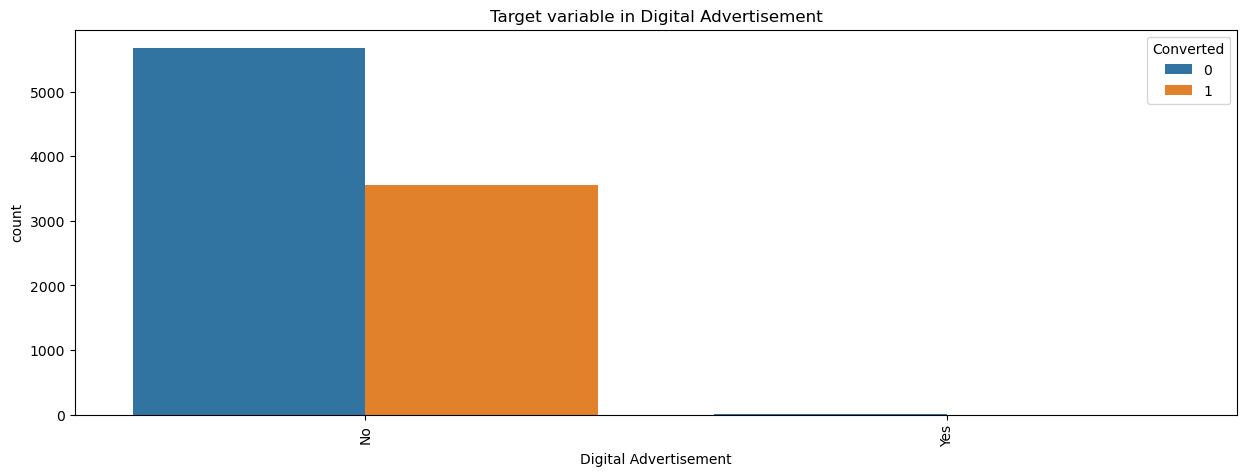

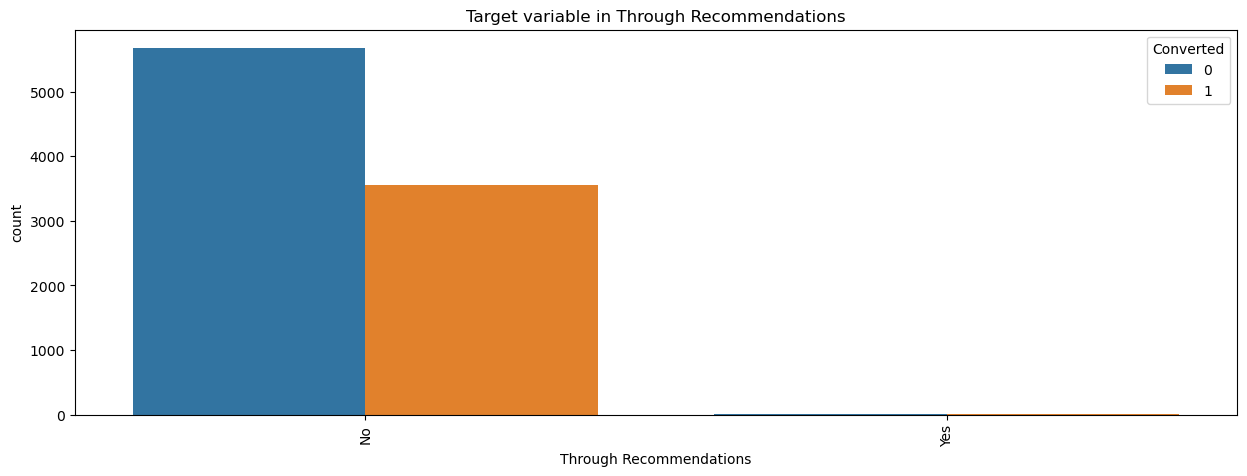

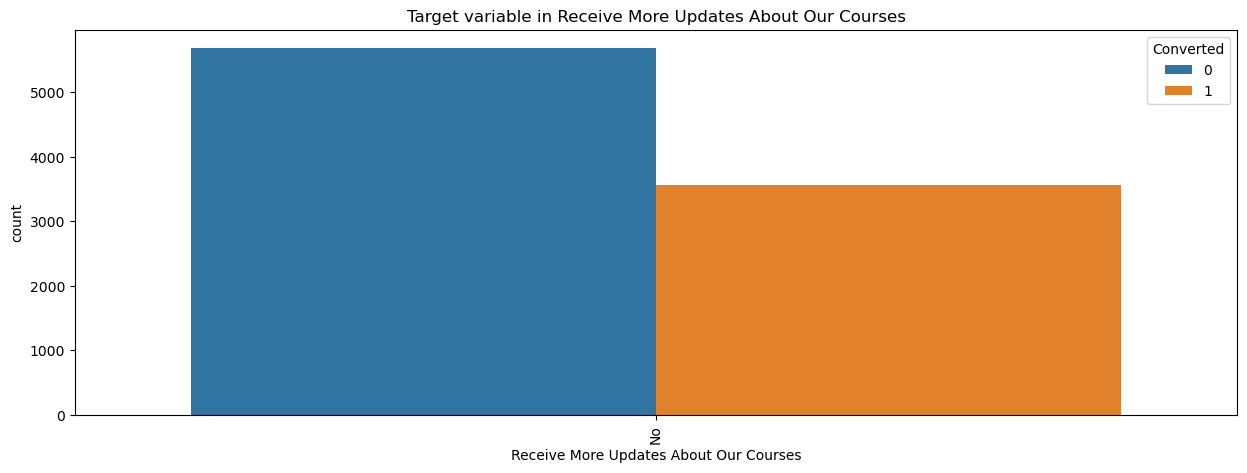

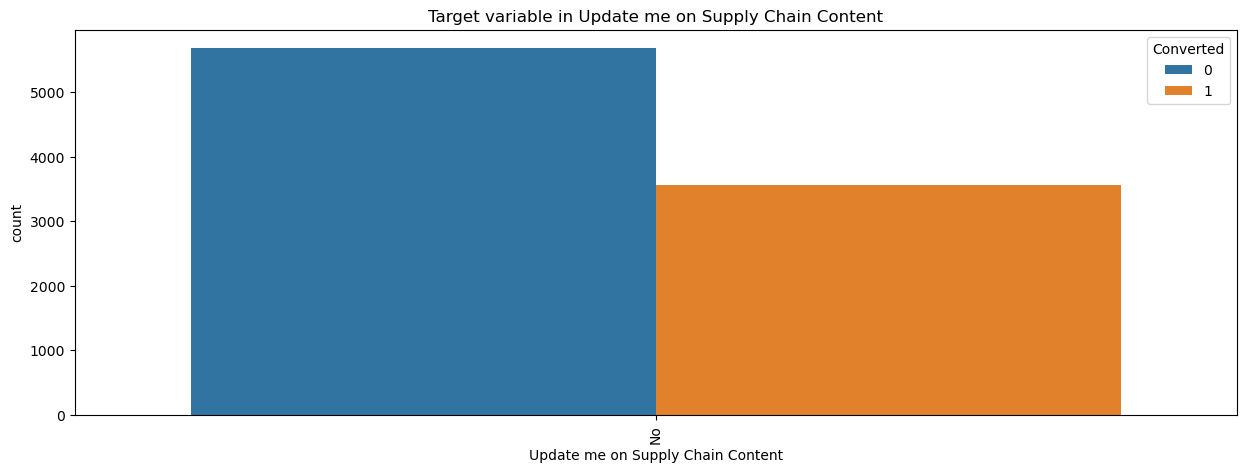

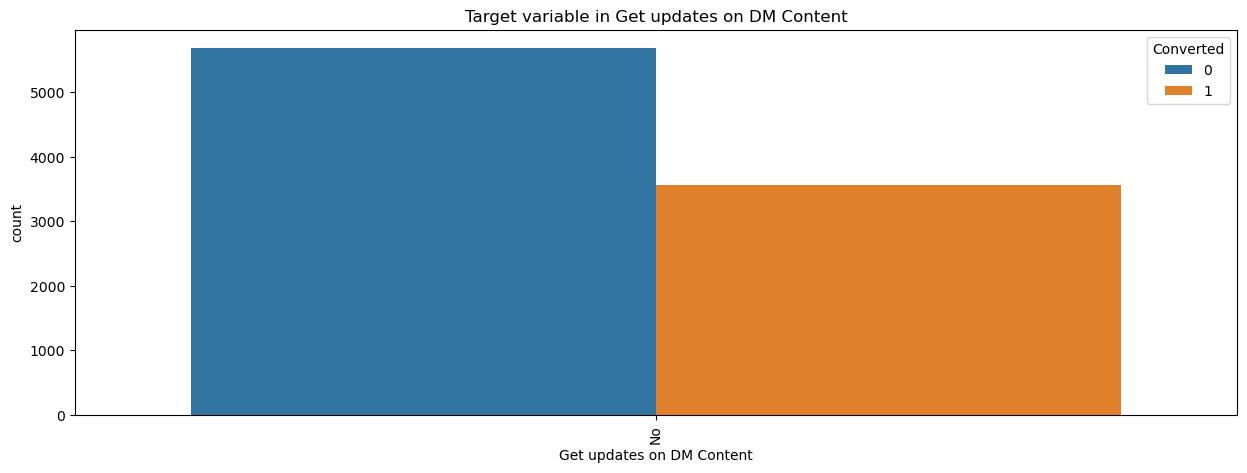

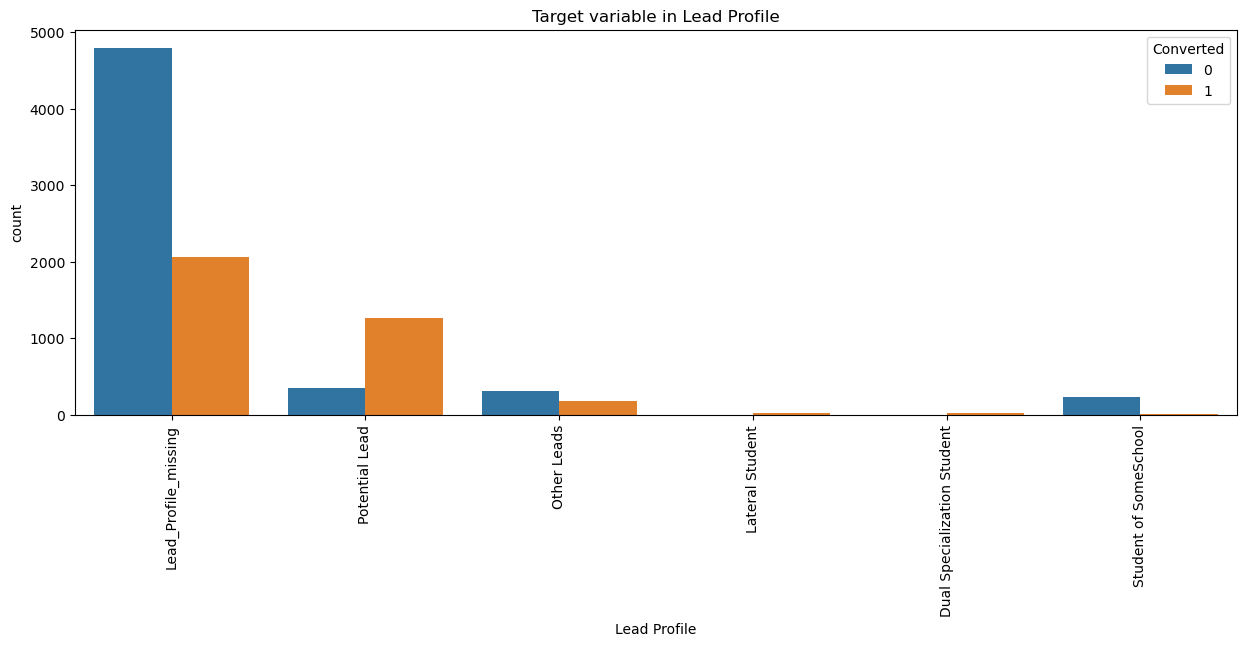

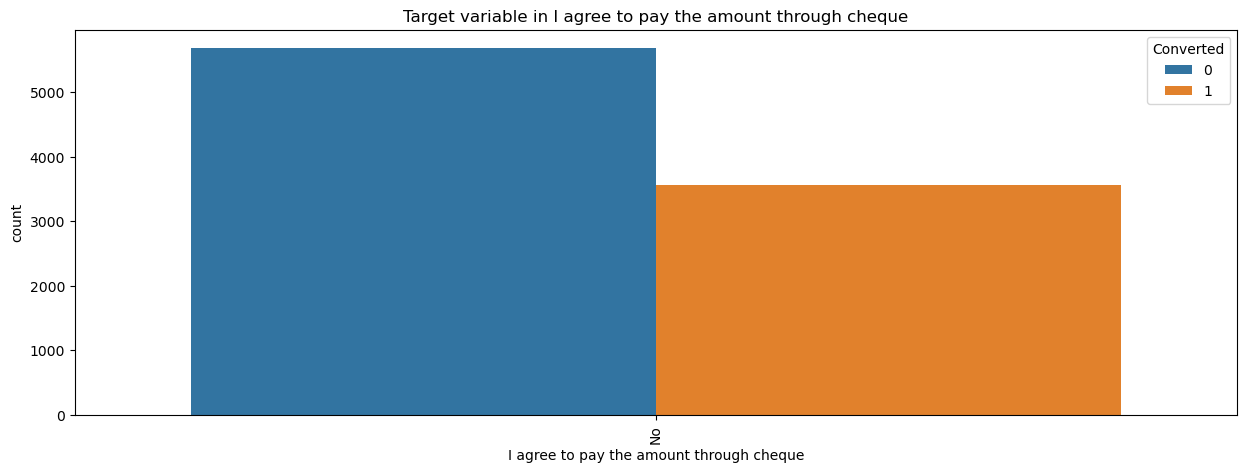

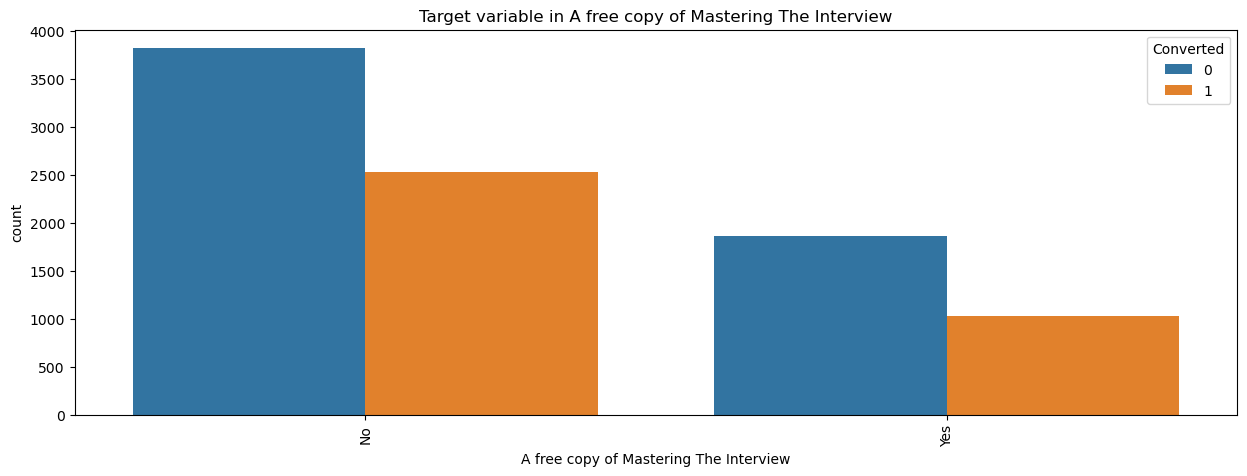

In [32]:
conv = lead_cl_df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(lead_cl_df[i], hue=lead_cl_df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

### OBSERVATIONS
- LANDING PAGE SUBMISSION HAS A HIGH PROB. OF CONVERSION
- LEADS COMING FROM REFERENCE AND WELINGAK WEBSITE HAS HIGH CONVERSION RATE
- LAST ACTIVITY SMS SENT HAS A HIGH CONVERSION RATE
- CLIENTS WITH NO SPECIALISATION INFO HAS A LOW RATE OF CONVERSION
- WORKING PROFESSIONAL HAS THE HIGHEST RATE OF CONVERSION
- IF WAT MATTERS MOST FIELD IS NOT FILLED UP, THEN IT IS NOT A GOOD LEAD
- LEADS THAT ARE IDENTIFIED AS POTENTIAL LEAD BY X-EDUCATION EMPLOYEES HAVE A HIGH CONVERSION RATE

### Checking for Outliers

In [33]:
round(lead_cl_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95,0.99]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.39,487.70,2.33
std,0.49,4.84,548.02,2.16
min,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00
35%,0.00,2.00,98.00,1.50
50%,0.00,3.00,248.00,2.00
55%,0.00,3.00,305.00,2.00
75%,1.00,5.00,936.00,3.00
95%,1.00,10.00,1562.00,6.00


We can say that 'TotalVisits' & 'Page Views Per Visit' have outliers in them and we need to treat them to make our dataset fit for the analysis.

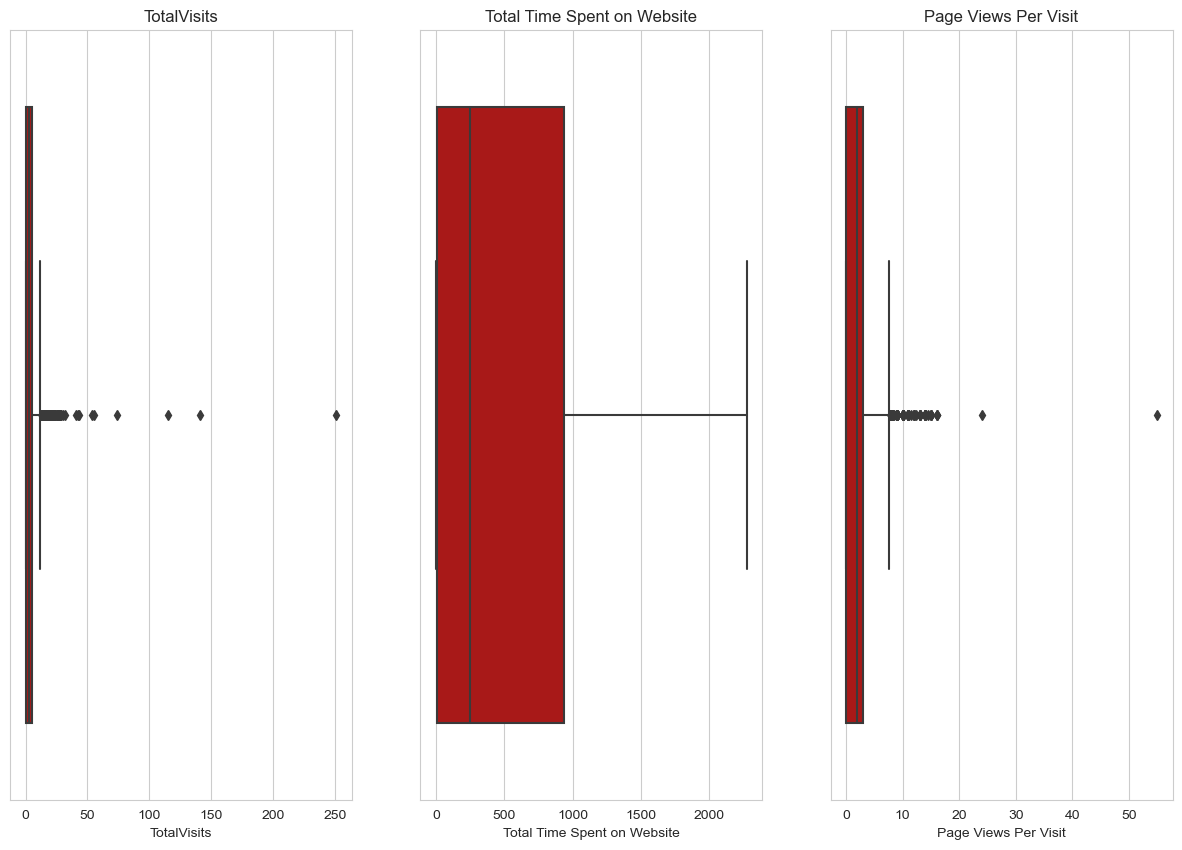

In [34]:
# Let's visualize the outliers

plt.figure(figsize=[15,10])
plt.tight_layout()
sns.set_style('whitegrid')

plt.subplot(1,3,1)
sns.boxplot(data = lead_cl_df, x = 'TotalVisits', palette='gist_heat', orient='v')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data = lead_cl_df, x = 'Total Time Spent on Website', palette='gist_heat', orient='v')
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(data = lead_cl_df, x = 'Page Views Per Visit', palette='gist_heat', orient='v')
plt.title('Page Views Per Visit')

plt.show()

From the above boxplots we can observe two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit').
We need to do a 0.99-0.1 analysis in order to correct the outliers.

In [35]:
lead_cl_df['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

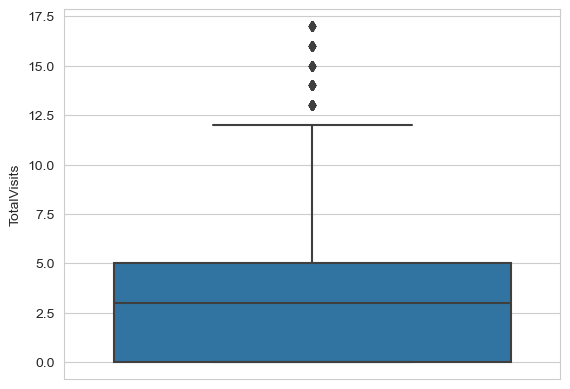

In [36]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_cl_df.TotalVisits.quantile(0.99)
lead_cl_df = lead_cl_df[(lead_cl_df.TotalVisits <= Q3)]

Q1 = lead_cl_df.TotalVisits.quantile(0.01)
lead_cl_df = lead_cl_df[(lead_cl_df.TotalVisits >= Q1)]

sns.boxplot(y=lead_cl_df['TotalVisits'])
plt.show()

In [37]:
lead_cl_df['Page Views Per Visit'].describe()

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

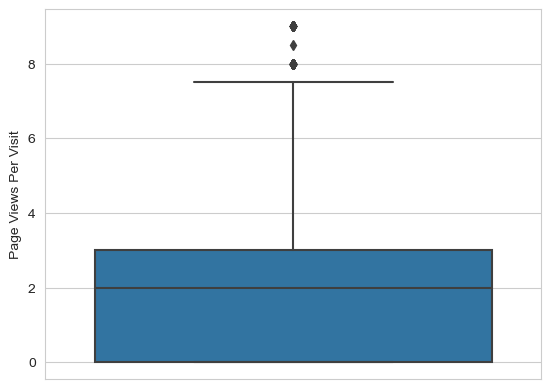

In [38]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_cl_df['Page Views Per Visit'].quantile(0.99)
lead_cl_df = lead_cl_df[lead_cl_df['Page Views Per Visit'] <= Q3]

Q1 = lead_cl_df['Page Views Per Visit'].quantile(0.01)
lead_cl_df = lead_cl_df[lead_cl_df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=lead_cl_df['Page Views Per Visit'])
plt.show()

In [39]:
lead_cl_df['Page Views Per Visit'].describe()

count    9090.000000
mean        2.232693
std         1.901055
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

The outliers have been removed from the dataset, now our data is clean and free from outliers.

Now our dataset is good for the further analysis as all the values and this is our final step for the data cleaning.

## Data Preparation

### Data Transformation


Now converting the columns having 'Yes / No' to '1 / 0'.
Changing the numerical columns to categorical columns with the help of above conversion

In [40]:
# Yes : 1
# No : 0

category = {'Yes':1, 'No':0}

# Do not Email col.
lead_cl_df['Do Not Email'] = lead_cl_df['Do Not Email'].map(category)

# Do Not Call col.
lead_cl_df['Do Not Call'] = lead_cl_df['Do Not Call'].map(category)

# Magazine col.
lead_cl_df['Magazine'] = lead_cl_df['Magazine'].map(category)

# Search col.
lead_cl_df['Search'] = lead_cl_df['Search'].map(category)

# Newspaper Article col.
lead_cl_df['Newspaper Article'] = lead_cl_df['Newspaper Article'].map(category)

# X Education Forums col.
lead_cl_df['X Education Forums'] = lead_cl_df['X Education Forums'].map(category)

# Newspaper col.
lead_cl_df['Newspaper'] = lead_cl_df['Newspaper'].map(category)

# Digital Advertisement col.
lead_cl_df['Digital Advertisement'] = lead_cl_df['Digital Advertisement'].map(category)

# Through Recommendations col.
lead_cl_df['Through Recommendations'] = lead_cl_df['Through Recommendations'].map(category)

# Receive More Updates About Our Courses col.
lead_cl_df['Receive More Updates About Our Courses'] = lead_cl_df['Receive More Updates About Our Courses'].map(category)

# Update me on Supply Chain Content col.
lead_cl_df['Update me on Supply Chain Content'] = lead_cl_df['Update me on Supply Chain Content'].map(category)

# Get updates on DM Content col.
lead_cl_df['Get updates on DM Content'] = lead_cl_df['Get updates on DM Content'].map(category)


# I agree to pay the amount through cheque col.
lead_cl_df['I agree to pay the amount through cheque'] = lead_cl_df['I agree to pay the amount through cheque'].map(category)

# A free copy of Mastering The Interview col.
lead_cl_df['A free copy of Mastering The Interview'] = lead_cl_df['A free copy of Mastering The Interview'].map(category)


In [41]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9090 non-null   object 
 1   Lead Source                                    9090 non-null   object 
 2   Do Not Email                                   9090 non-null   int64  
 3   Do Not Call                                    9090 non-null   int64  
 4   Converted                                      9090 non-null   int64  
 5   TotalVisits                                    9090 non-null   float64
 6   Total Time Spent on Website                    9090 non-null   int64  
 7   Page Views Per Visit                           9090 non-null   float64
 8   Last Activity                                  9090 non-null   object 
 9   Specialization                                 9090 

- After converting the binary categories from 'Yes' to 1 & 'No' to 0, we will now create dummy variables.

In [42]:
# Creating dummy variables for the 8 categories and dropping the first level

dummy = pd.get_dummies(lead_cl_df[['Lead Origin','Lead Source', 'Specialization','Lead Profile',
                                   'What is your current occupation', 'What matters most to you in choosing a course'
                                  ]], drop_first=True)

# Adding the dummies to the original dataset

lead_cl_df = pd.concat([lead_cl_df,dummy], axis=1)

In [43]:
lead_cl_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

- Column 'last activity' has a value 'Converted to Lead' which is redundant information, since all the dataset is of leads.

In [44]:
# Creating dummy variables for the remaining categorical variables and dropping the level with redundant informaiont.


# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(lead_cl_df['Last Activity'], prefix='Last Activity')
ml

# Dropping Last Activity_Converted to Lead column
ml1 = ml.drop(['Last Activity_Converted to Lead'], 1)

#Adding the results to the master dataframe
lead_cl_df = pd.concat([lead_cl_df,ml1], axis=1)

In [45]:
lead_cl_df.shape

(9090, 96)

### Now removing the Duplicate columns

In [46]:
# We have created a dummies for the below categories hence removing the original column.

dup = ['Lead Origin','Lead Source','Last Activity', 'Specialization','Lead Profile',
        'What is your current occupation', 'What matters most to you in choosing a course']

lead_cl_df = lead_cl_df.drop(dup, axis=1)
lead_cl_df.shape

(9090, 89)

In [47]:
# Removing redundant columns from the dataset

#redun = ['Receive More Updates About Our Courses','Update me on Supply Chain Content',
        # 'Get updates on DM Content','Magazine']

#lead_cl_df = lead_cl_df.drop(redun, axis=1)

In [48]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 89 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9090 non-null   int64  
 1   Do Not Call                                                              9090 non-null   int64  
 2   Converted                                                                9090 non-null   int64  
 3   TotalVisits                                                              9090 non-null   float64
 4   Total Time Spent on Website                                              9090 non-null   int64  
 5   Page Views Per Visit                                                     9090 non-null   float64
 6   Search                                                                  

Till here we have changed all the datatypes to numeric types

# Correlation of the dataset

In [49]:
lead_cl_df.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_specialization_info,Lead Profile_Lateral Student,Lead Profile_Lead_Profile_missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,What is your current occupation_Housewife,What is your current occupation_Occupation_status_missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_What_matters_more_missing,Last Activity_Approached upfront,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
Do Not Email,1.000000,-0.004308,-0.133269,-0.016344,-0.046930,0.015380,-0.010990,NaN,-0.003046,NaN,-0.003046,-0.005277,-0.007464,NaN,NaN,NaN,NaN,0.054619,0.092187,-0.019455,-0.017362,0.036119,-0.003046,-0.006093,0.104545,-0.017362,-0.058965,-0.004308,-0.003046,-0.049292,0.035460,-0.003046,0.036119,-0.037512,-0.011297,-0.004308,-0.003046,-0.003046,-0.003046,-0.000147,0.036119,0.006769,0.008633,0.025021,-0.006136,0.013092,0.012940,-0.019330,0.069504,0.007649,-0.024937,0.001688,-0.012154,0.014586,0.021406,0.057580,0.003195,0.055193,-0.036024,-0.005945,0.039864,-0.005848,-0.063159,0.052094,-0.009638,0.048707,-0.000931,0.007985,-0.018830,-0.051011,-0.004308,-0.003046,0.057270,-0.009142,0.628773,-0.042888,0.051082,-0.221820,-0.004308,-0.021655,-0.009145,-0.053571,0.061165,-0.003046,-0.013963,0.007931,0.265469,-0.006093,-0.003046
Do Not Call,-0.004308,1.000000,0.018770,0.007166,0.006961,-0.005718,-0.000561,NaN,-0.000156,NaN,-0.000156,-0.000270,-0.000381,NaN,NaN,NaN,NaN,-0.009893,-0.015585,0.023177,-0.001157,-0.000156,-0.000156,-0.000311,-0.009135,-0.001157,0.005853,-0.000220,-0.000156,-0.007251,-0.005482,-0.000156,-0.000156,0.027869,-0.001694,-0.000220,-0.000156,-0.000156,-0.000156,-0.001869,-0.000156,-0.003158,-0.001168,-0.001627,-0.005

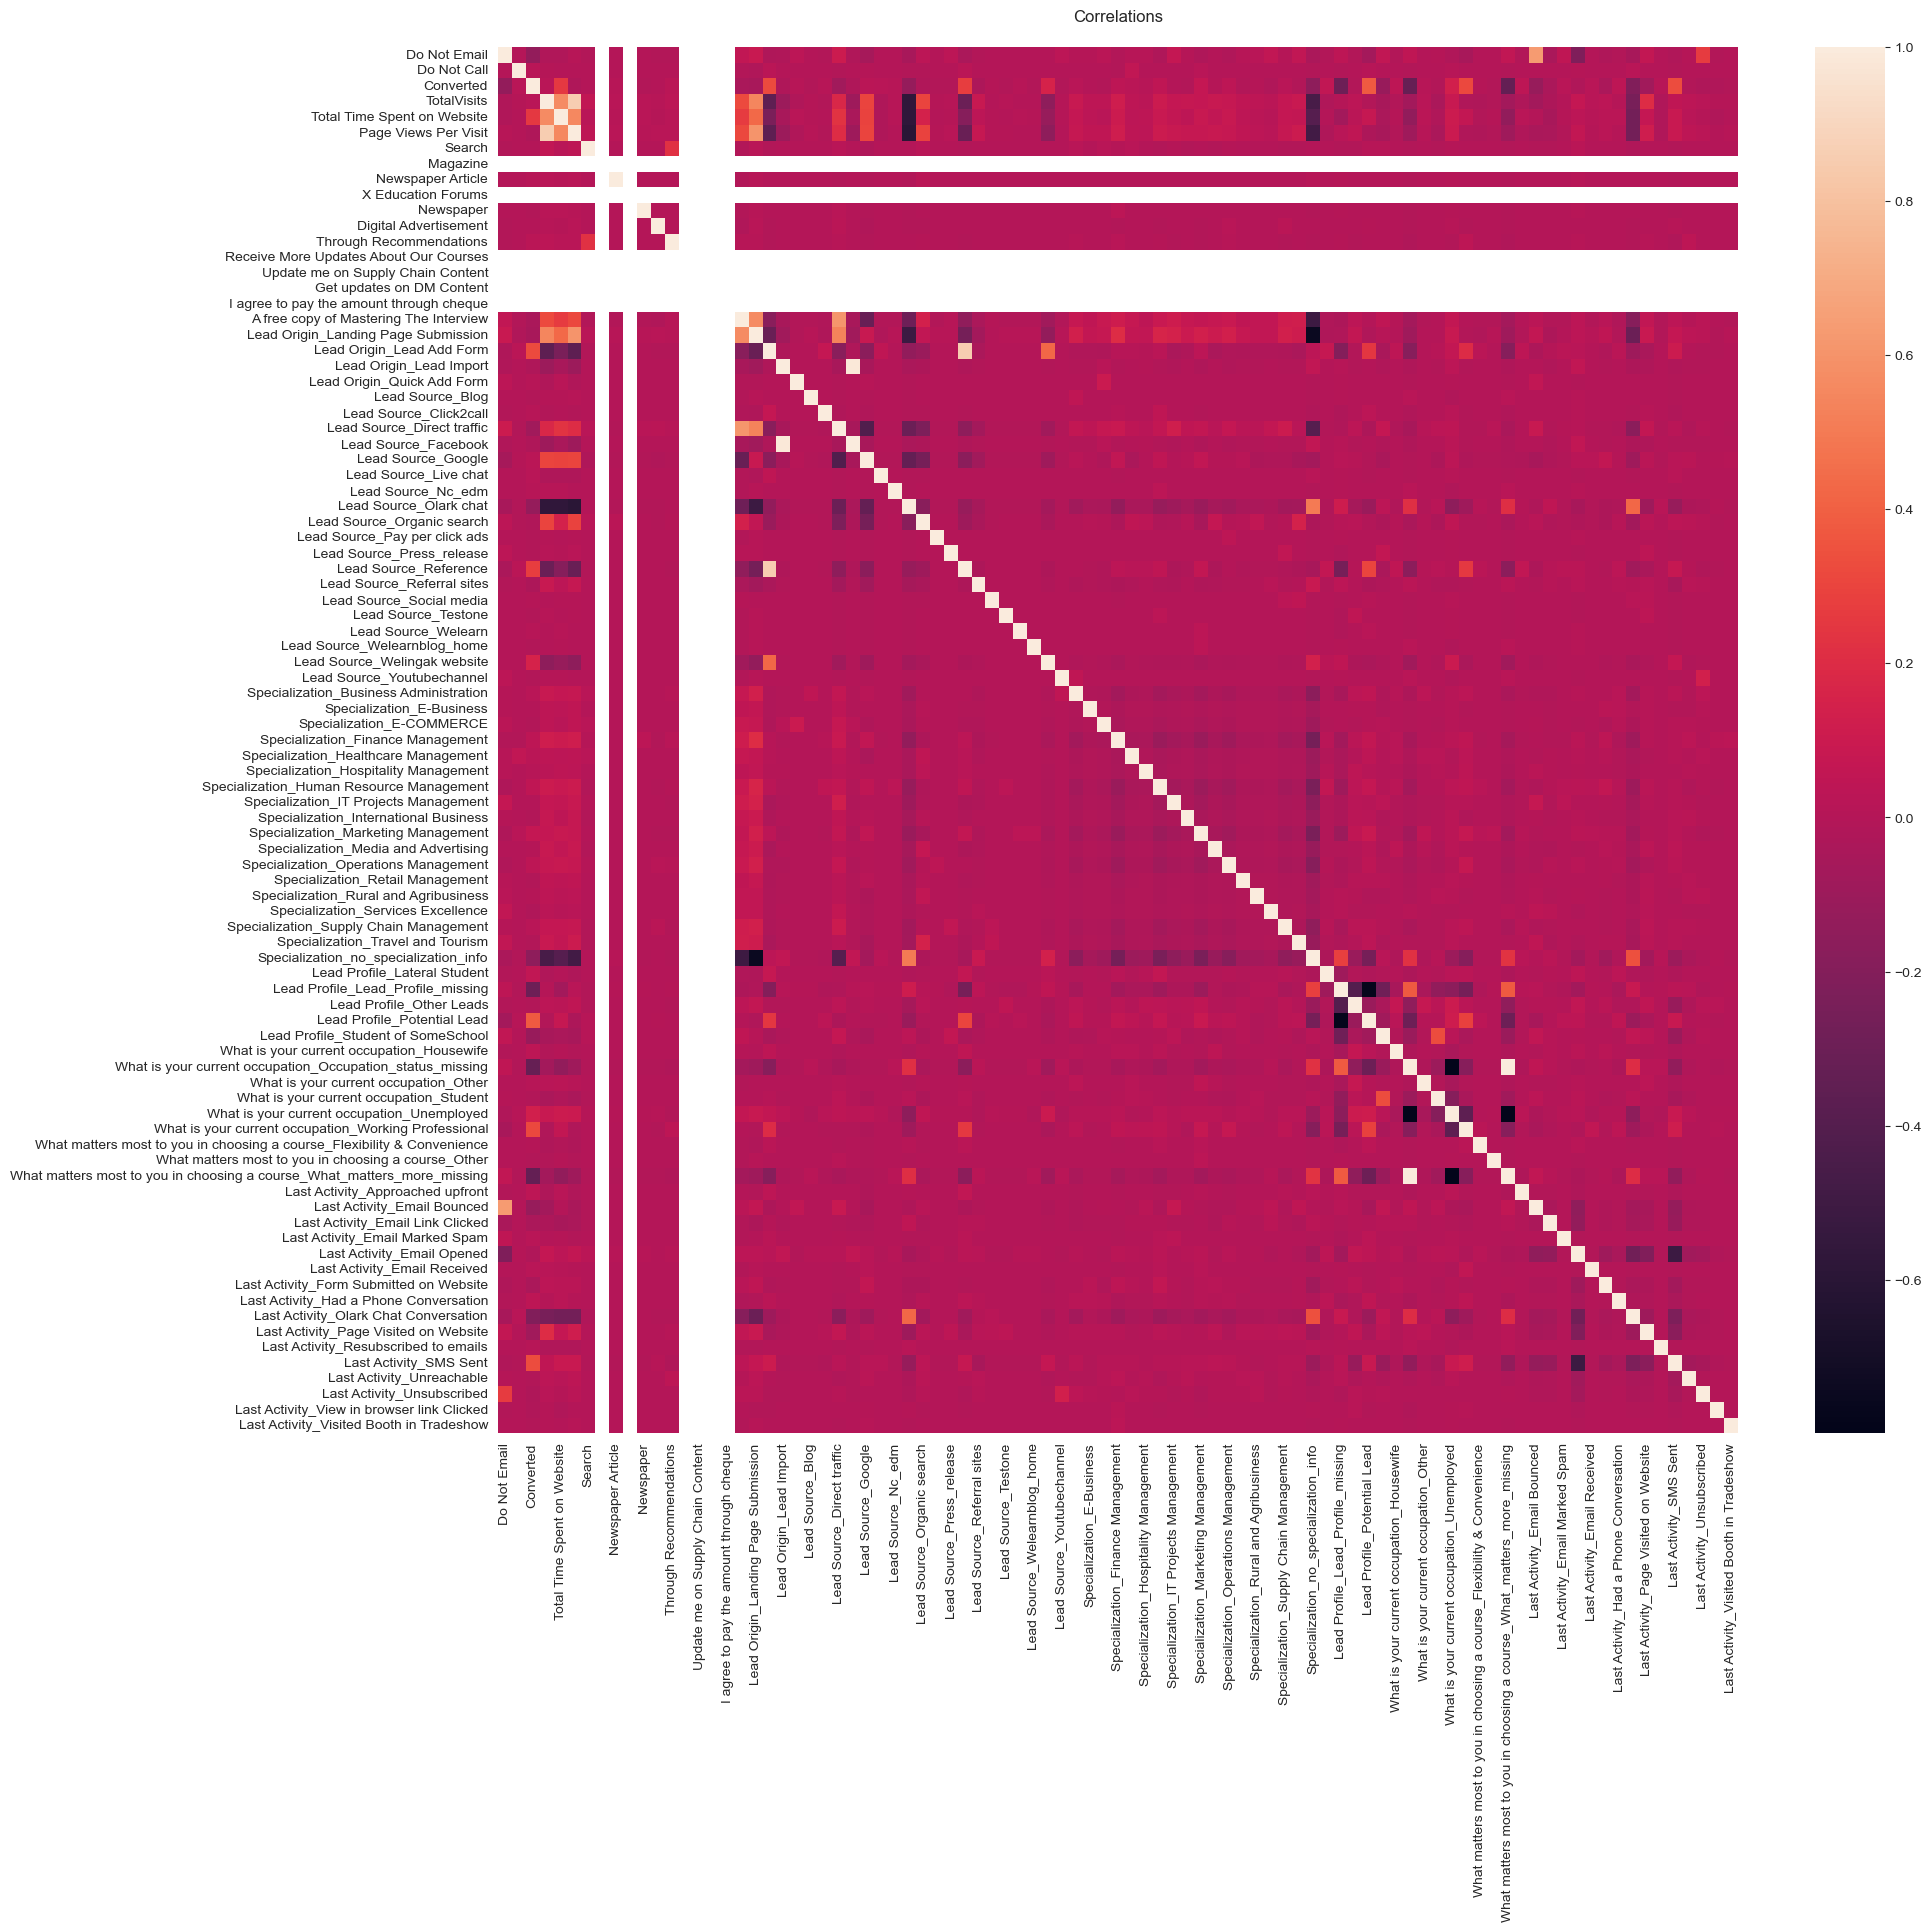

In [50]:
# With the help of Heatmap we can identify the high correlated data.

plt.figure(figsize=[20,18])

sns.heatmap(lead_cl_df.corr(method='spearman'))

plt.title('Correlations\n')

plt.show()

We have removed some of the correlated and null columns but it is quiet difficult to spot the high correlation attributes.
We will start building the model and with the help of VIFs and p-Value we will find out the relations.

In [51]:
lead_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 89 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9090 non-null   int64  
 1   Do Not Call                                                              9090 non-null   int64  
 2   Converted                                                                9090 non-null   int64  
 3   TotalVisits                                                              9090 non-null   float64
 4   Total Time Spent on Website                                              9090 non-null   int64  
 5   Page Views Per Visit                                                     9090 non-null   float64
 6   Search                                                                  

In [52]:
conv = lead_cl_df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(lead_cl_df[i], hue=lead_cl_df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

In [53]:
### Checking the Convertion Rate
conv_rate = (sum(lead_cl_df['Converted'])/len(lead_cl_df['Converted'].index))*100
conv_rate

38.448844884488445

We have almost 38% Conversion rate

### Conversion Rate and Class Imbalance

Another thing to note that the data has almost 38% Conversion rate. Checking the Conversion rate is important since we usually want data to have a balance between the 0s and 1s (in this case converted and not-converted). 

Fortunately, in this case, we have about 38% Convert rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

# Model Building
Let's start by splitting our data into a training set and a test set.

## Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Separating the Target Variable

y = lead_cl_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Remaining dataset

X = lead_cl_df.drop('Converted', axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_specialization_info,Lead Profile_Lateral Student,Lead Profile_Lead_Profile_missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,What is your current occupation_Housewife,What is your current occupation_Occupation_status_missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_What_matters_more_missing,Last Activity_Approached upfront,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
pd.set_option('display.max_columns', 110)
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_specialization_info,Lead Profile_Lateral Student,Lead Profile_Lead_Profile_missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,What is your current occupation_Housewife,What is your current occupation_Occupation_status_missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_What_matters_more_missing,Last Activity_Approached upfront,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.0,6363.0,6363.0,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.00000,6363.000000,6363.000000,6363.0
mean,0.077165,0.000314,3.107496,483.710042,2.218447,0.000943,0.0,0.000157,0.0,0.000157,0.000471,0.000471,0.0,0.0,0.0,0.0,0.302845,0.526167,0.078736,0.005658,0.000157,0.0,0.000314,0.272513,0.005815,0.319346,0.000314,0.000157,0.191733,0.121169,0.0,0.0

In [60]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_no_specialization_info,Lead Profile_Lateral Student,Lead Profile_Lead_Profile_missing,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,What is your current occupation_Housewife,What is your current occupation_Occupation_status_missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_What_matters_more_missing,Last Activity_Approached upfront,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6363.000000,6363.000000,6.363000e+03,6.363000e+03,6.363000e+03,6363.000000,6363.0,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.0,6363.0,6363.0,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.0,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.00000,6363.000000,6363.000000,6363.0
mean,0.077165,0.000314,1.563350e-15,-1.354671e-16,-4.667717e-16,0.000943,0.0,0.000157,0.0,0.000157,0.000471,0.000471,0.0,0.0,0.0,0.0,0.302845,0.526167,0.078736,0.005658,0.000157,0.0,0.000314,0.272513,0.005815,0.319346,0.000314,0.000157,0.191733,0

- We used standard scaler to scale the following variables

'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

#### Running Your First Training Model

In [61]:
import statsmodels.api as sm

## GLM - General Linear Model

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 May 2023   Deviance:                   1.4847e+05
Time:                        20:05:30   Pearson chi2:                 7.26e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.835e+15   5.38e+07   8.99e+07      0.000    4.84e+15    4.84e+15
Do Not Email                                                            -7.337e+14   4.47e+06  -1.64e+08      0.000   -7.34e+14   -7.34e+14
Do Not Call                                                              1.648e+15   4.77e+07   3.46e+07      0.000    1.65e+15    1.65e+15
TotalVisits                                                              1.549e+14   1.31e+06   1.18e+08      0.000    1.55e+14    1.55e+14
Total Time Spent on Website                                              8.043e+14   9.65e+05   8.33e+08      0.000    8.04e+14    8.04e+14
Page Views Per Visit                                                    -1.595e+14   1.44e+06   -1.1e+08      0.000   -1.59e+14   -1.59e+14
Search                                                                   5.956e+14   2.76e+07   2.16e+07      0.000    5.96e+14    5.96e+14
Magazine                                                                    9.1101   1.58e-06   5.76e+06      0.000       9.110       9.110
Newspaper Article                                                        3.913e+15   6.74e+07   5.81e+07      0.000    3.91e+15    3.91e+15
X Education Forums                                                         34.2106   9.88e-07   3.46e+07      0.000      34.211      34.211
Newspaper                                                               -6.854e+15   6.73e+07  -1.02e+08      0.000   -6.85e+15   -6.85e+15
Digital Advertisement                                                   -2.047e+15   3.89e+07  -5.26e+07      0.000   -2.05e+15   -2.05e+15
Through Recommendations                                                  3.435e+15    3.9e+07    8.8e+07      0.000    3.43e+15    3.43e+15
Receive More Updates About Our Courses                                    -13.8544   6.79e-07  -2.04e+07      0.000     -13.854     -13.854
Update me on Supply Chain Content                                          29.6418   3.53e-07   8.41e+07      0.000      29.642      29.642
Get updates on DM Content                                                  45.5997   7.35e-07   6.21e+07      0.000      45.600      45.600
I agree to pay the amount through cheque                                   38.0273   1.08e-06   3.51e+07      0.000      38.027      38.027
A free copy of Mastering The Interview                                  -5.854e+13   2.73e+06  -2.14e+07      0.000   -5.85e+13   -5.85e+13
Lead Origin_Landing Page Submission                                     -2.159e+14   3.54e+06   -6.1e+07      0.000   -2.16e+14   -2.16e+14
Lea

In this table, our key focus area is just the different coefficients and their respective p-values. As there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.
 

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE

In [63]:
#  imported the logistic regression library from sklearn and created a logistic regression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [64]:
# Run an RFE on the dataset
# we choose to select 20 features first (19 is an arbitrary number)

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=19)          # running RFE with 19 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False])

In [66]:
# RFE selected 20 features for the model

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Search', False, 36),
 ('Magazine', False, 62),
 ('Newspaper Article', False, 14),
 ('X Education Forums', False, 69),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 29),
 ('Through Recommendations', False, 17),
 ('Receive More Updates About Our Courses', False, 65),
 ('Update me on Supply Chain Content', False, 66),
 ('Get updates on DM Content', False, 68),
 ('I agree to pay the amount through cheque', False, 67),
 ('A free copy of Mastering The Interview', False, 49),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Blog', False, 64),
 ('Lead Source_Click2call', False, 57),
 ('Lead Source_Direct traffic', False, 22),
 ('Lead Source_Facebook', False, 15),
 ('Lead

In [67]:
# list of selected columns through RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark chat',
       'Lead Source_Welingak website', 'Specialization_Hospitality Management',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_What_matters_more_missing',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

##### Assessing the model with StatsModels

We decided to go ahead with this model but since we are also interested in the statistics, we take the columns selected by RFE and use them to build a model using statsmodels using the below codes

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2416.3
Date:                Mon, 22 May 2023   Deviance:                       4832.6
Time:                        20:05:47   Pearson chi2:                 7.30e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4346
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.7535      0.264     -2.855      0.004      -1.271      -0.236
Do Not Email                                                               -1.5037      0.184     -8.185      0.000      -1.864      -1.144
Total Time Spent on Website                                                 1.0871      0.042     26.124      0.000       1.006       1.169
Lead Origin_Lead Add Form                                                   2.9793      0.203     14.663      0.000       2.581       3.378
Lead Source_Olark chat                                                      1.3999      0.110     12.686      0.000       1.184       1.616
Lead Source_Welingak website                                                3.4128      1.029      3.316      0.001       1.396       5.430
Specialization_Hospitality Management                                      -0.8761      0.347     -2.522      0.012      -1.557      -0.195
Lead Profile_Lateral Student                                                2.7669      1.107      2.499      0.012       0.597       4.937
Lead Profile_Potential Lead                                                 1.5661      0.102     15.353      0.000       1.366       1.766
Lead Profile_Student of SomeSchool                                         -2.4660      0.451     -5.466      0.000      -3.350      -1.582
What is your current occupation_Housewife                                  23.2387   2.27e+04      0.001      0.999   -4.45e+04    4.45e+04
What is your current occupation_Unemployed                                 -0.7718      0.262     -2.940      0.003      -1.286      -0.257
What is your current occupation_Working Professional                        1.5690      0.318      4.933      0.000       0.946       2.192
What matters most to you in choosing a course_What_matters_more_missing    -1.7561      0.272     -6.450      0.000      -2.290      -1.223
Last Activity_Approached upfront                                           22.4833   2.95e+04      0.001      0.999   -5.78e+04    5.78e+04
Last Activity_Had a Phone Conversation                                      1.4268      0.670      2.129      0.033       0.113       2.740
Last Activity_Olark Chat Conversation                                      -1.1839      0.171     -6.943      0.000      -1.518      -0.850
Last Activity_Resubscribed to emails                                       25.6404   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_SMS Sent                                                      1.4209      0.078     18.133      0.000       1.267       1.575
Las

In above
Here, we use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Converted' and 'Not-converted').

In [69]:
# DROPPING COL. WITH HIGH P VALUE-  What is your current occupation_Housewife
X_train_sm = X_train_sm.drop(["What is your current occupation_Housewife"], axis = 1)

In [70]:
col = col.drop('What is your current occupation_Housewife', 1)

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2420.5
Date:                Mon, 22 May 2023   Deviance:                       4840.9
Time:                        20:05:48   Pearson chi2:                 7.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4338
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.5723      0.256     -2.239      0.025      -1.073      -0.071
Do Not Email                                                               -1.5055      0.184     -8.193      0.000      -1.866      -1.145
Total Time Spent on Website                                                 1.0862      0.042     26.126      0.000       1.005       1.168
Lead Origin_Lead Add Form                                                   2.9876      0.203     14.730      0.000       2.590       3.385
Lead Source_Olark chat                                                      1.3941      0.110     12.641      0.000       1.178       1.610
Lead Source_Welingak website                                                3.4012      1.029      3.305      0.001       1.384       5.418
Specialization_Hospitality Management                                      -0.8828      0.348     -2.540      0.011      -1.564      -0.202
Lead Profile_Lateral Student                                                2.7625      1.107      2.495      0.013       0.592       4.933
Lead Profile_Potential Lead                                                 1.5604      0.102     15.313      0.000       1.361       1.760
Lead Profile_Student of SomeSchool                                         -2.5447      0.452     -5.633      0.000      -3.430      -1.659
What is your current occupation_Unemployed                                 -0.9485      0.255     -3.723      0.000      -1.448      -0.449
What is your current occupation_Working Professional                        1.3934      0.312      4.465      0.000       0.782       2.005
What matters most to you in choosing a course_What_matters_more_missing    -1.9329      0.265     -7.297      0.000      -2.452      -1.414
Last Activity_Approached upfront                                           21.4779   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
Last Activity_Had a Phone Conversation                                      1.4240      0.670      2.126      0.034       0.111       2.737
Last Activity_Olark Chat Conversation                                      -1.1895      0.171     -6.974      0.000      -1.524      -0.855
Last Activity_Resubscribed to emails                                       24.6410   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                                      1.4163      0.078     18.081      0.000       1.263       1.570
Last Activity_Unsubscribed                                                  1.4046      0.479      2.931      0.003       0.465       2.344
===

In [72]:
# DROPPING COL. WITH HIGH P VALUE-  Last Activity_Resubscribed to emails
X_train_sm = X_train_sm.drop(["Last Activity_Resubscribed to emails"], axis = 1)

In [73]:
col = col.drop('Last Activity_Resubscribed to emails', 1)

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2422.7
Date:                Mon, 22 May 2023   Deviance:                       4845.3
Time:                        20:05:48   Pearson chi2:                 7.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4334
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.5725      0.256     -2.241      0.025      -1.073      -0.072
Do Not Email                                                               -1.5059      0.184     -8.198      0.000      -1.866      -1.146
Total Time Spent on Website                                                 1.0857      0.042     26.123      0.000       1.004       1.167
Lead Origin_Lead Add Form                                                   2.9880      0.203     14.733      0.000       2.591       3.385
Lead Source_Olark chat                                                      1.3999      0.110     12.703      0.000       1.184       1.616
Lead Source_Welingak website                                                3.4011      1.029      3.305      0.001       1.384       5.418
Specialization_Hospitality Management                                      -0.8826      0.348     -2.540      0.011      -1.564      -0.201
Lead Profile_Lateral Student                                                2.7626      1.107      2.495      0.013       0.592       4.933
Lead Profile_Potential Lead                                                 1.5603      0.102     15.313      0.000       1.361       1.760
Lead Profile_Student of SomeSchool                                         -2.5454      0.452     -5.635      0.000      -3.431      -1.660
What is your current occupation_Unemployed                                 -0.9480      0.255     -3.721      0.000      -1.447      -0.449
What is your current occupation_Working Professional                        1.3938      0.312      4.466      0.000       0.782       2.005
What matters most to you in choosing a course_What_matters_more_missing    -1.9274      0.265     -7.278      0.000      -2.446      -1.408
Last Activity_Approached upfront                                           21.4783   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
Last Activity_Had a Phone Conversation                                      1.4233      0.670      2.125      0.034       0.110       2.736
Last Activity_Olark Chat Conversation                                      -1.1950      0.170     -7.010      0.000      -1.529      -0.861
Last Activity_SMS Sent                                                      1.4141      0.078     18.062      0.000       1.261       1.568
Last Activity_Unsubscribed                                                  1.4031      0.479      2.928      0.003       0.464       2.342
===========================================================================================================================================
"""

In [75]:
# DROPPING COL. WITH HIGH P VALUE-  Last Activity_Approached upfront
X_train_sm = X_train_sm.drop(["Last Activity_Approached upfront"], axis = 1)

In [76]:
col = col.drop('Last Activity_Approached upfront', 1)

In [77]:
X_train_sm = sm.add_constant(X_train[col]) # adding const
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2424.5
Date:                Mon, 22 May 2023   Deviance:                       4849.0
Time:                        20:05:48   Pearson chi2:                 7.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4331
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.5717      0.256     -2.237      0.025      -1.073      -0.071
Do Not Email                                                               -1.5083      0.184     -8.208      0.000      -1.868      -1.148
Total Time Spent on Website                                                 1.0887      0.042     26.206      0.000       1.007       1.170
Lead Origin_Lead Add Form                                                   2.9973      0.202     14.804      0.000       2.600       3.394
Lead Source_Olark chat                                                      1.4016      0.110     12.718      0.000       1.186       1.618
Lead Source_Welingak website                                                3.3923      1.029      3.296      0.001       1.375       5.409
Specialization_Hospitality Management                                      -0.8861      0.348     -2.549      0.011      -1.567      -0.205
Lead Profile_Lateral Student                                                2.7578      1.107      2.490      0.013       0.587       4.928
Lead Profile_Potential Lead                                                 1.5576      0.102     15.287      0.000       1.358       1.757
Lead Profile_Student of SomeSchool                                         -2.5499      0.452     -5.644      0.000      -3.435      -1.664
What is your current occupation_Unemployed                                 -0.9453      0.255     -3.709      0.000      -1.445      -0.446
What is your current occupation_Working Professional                        1.3942      0.312      4.466      0.000       0.782       2.006
What matters most to you in choosing a course_What_matters_more_missing    -1.9279      0.265     -7.278      0.000      -2.447      -1.409
Last Activity_Had a Phone Conversation                                      1.4202      0.670      2.120      0.034       0.107       2.733
Last Activity_Olark Chat Conversation                                      -1.1973      0.171     -7.022      0.000      -1.531      -0.863
Last Activity_SMS Sent                                                      1.4111      0.078     18.026      0.000       1.258       1.565
Last Activity_Unsubscribed                                                  1.4020      0.479      2.925      0.003       0.462       2.342
===========================================================================================================================================
"""

- p-values looks within limit

In [78]:
print (res)

As the logistic regression curve gives the probabilities of Converted and not-converte. We can get these probabilities by using the 'predict' function.

In [79]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.048965
6087    0.027319
1033    0.175891
7656    0.132702
3241    0.705009
5738    0.032300
7366    0.208571
3680    0.039387
4170    0.686410
43      0.046425
dtype: float64

In [80]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04896489, 0.02731939, 0.17589084, 0.13270234, 0.70500891,
       0.0323002 , 0.20857095, 0.03938711, 0.68640957, 0.04642544])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [81]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,CustID
0,0,0.048965,302
1,0,0.027319,6087
2,0,0.175891,1033
3,0,0.132702,7656
4,1,0.705009,3241


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

Since the logistic curve gives just the probabilities and not the actual classification of 'Converted' and 'Not-converted', we need to find a threshold probability to classify leads as 'Converted' and 'Non-Converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular lead getting Converted is less than 0.5, we'd classify it as 'Not-converted' and if it's greater than 0.5, we'd classify it as 'Converted'.

Later we would adjust the cutoff to make more business sense.

In [82]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.048965,302,0
1,0,0.027319,6087,0
2,0,0.175891,1033,0
3,0,0.132702,7656,0
4,1,0.705009,3241,1


In [83]:
from sklearn import metrics

In [84]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3494  441]
 [ 643 1785]]


In [85]:
# Predicted     not_converted  converted
# Actual
# not_converted        3494          441
# converted            643         1785  


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8296401068678296


## Checking VIFs

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,1.88
3,Lead Source_Olark chat,1.76
2,Lead Origin_Lead Add Form,1.62
14,Last Activity_SMS Sent,1.56
7,Lead Profile_Potential Lead,1.49
13,Last Activity_Olark Chat Conversation,1.45
11,What matters most to you in choosing a course_...,1.42
10,What is your current occupation_Working Profes...,1.37
4,Lead Source_Welingak website,1.32
1,Total Time Spent on Website,1.27


VIFS ARE WITHIN LIMIT. BUT AS WE HAVE HIGH NUMBERS OF VAIRALBES, WE SHALL TRY TO MAKE THE MODEL LESS COMPLEX BY DROPPING VARIABLES WITH COMPARATIVELY HIGH VIFS WITHOUT COMPROMISING THE PREDINCTIVE POWER.

In [89]:
col = col.drop('What is your current occupation_Unemployed', 1)

In [90]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2431.7
Date:                Mon, 22 May 2023   Deviance:                       4863.3
Time:                        20:05:49   Pearson chi2:                 7.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4318
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.4911      0.064    -23.167      0.000      -1.617      -1.365
Do Not Email                                                               -1.5216      0.184     -8.288      0.000      -1.881      -1.162
Total Time Spent on Website                                                 1.0892      0.042     26.242      0.000       1.008       1.171
Lead Origin_Lead Add Form                                                   3.0304      0.203     14.951      0.000       2.633       3.428
Lead Source_Olark chat                                                      1.4067      0.110     12.780      0.000       1.191       1.622
Lead Source_Welingak website                                                3.3434      1.029      3.249      0.001       1.326       5.360
Specialization_Hospitality Management                                      -0.8745      0.347     -2.521      0.012      -1.554      -0.195
Lead Profile_Lateral Student                                                2.7313      1.108      2.466      0.014       0.560       4.902
Lead Profile_Potential Lead                                                 1.5686      0.102     15.414      0.000       1.369       1.768
Lead Profile_Student of SomeSchool                                         -2.2311      0.444     -5.030      0.000      -3.100      -1.362
What is your current occupation_Working Professional                        2.2996      0.192     11.959      0.000       1.923       2.676
What matters most to you in choosing a course_What_matters_more_missing    -1.0072      0.092    -10.977      0.000      -1.187      -0.827
Last Activity_Had a Phone Conversation                                      1.3948      0.670      2.081      0.037       0.081       2.708
Last Activity_Olark Chat Conversation                                      -1.1916      0.170     -7.002      0.000      -1.525      -0.858
Last Activity_SMS Sent                                                      1.3998      0.078     17.925      0.000       1.247       1.553
Last Activity_Unsubscribed                                                  1.3900      0.480      2.897      0.004       0.449       2.331
===========================================================================================================================================
"""

In [91]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [92]:
y_train_pred[:10]

array([0.0490202 , 0.0271286 , 0.17968131, 0.13284311, 0.70813734,
       0.03233171, 0.0959982 , 0.03942848, 0.68964064, 0.04647699])

In [93]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [94]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.049020,302,0
1,0,0.027129,6087,0
2,0,0.179681,1033,0
3,0,0.132843,7656,0
4,1,0.708137,3241,1


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.828068521137828


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark chat,1.67
2,Lead Origin_Lead Add Form,1.59
12,Last Activity_Olark Chat Conversation,1.42
7,Lead Profile_Potential Lead,1.34
10,What matters most to you in choosing a course_...,1.33
4,Lead Source_Welingak website,1.31
13,Last Activity_SMS Sent,1.26
1,Total Time Spent on Website,1.25
9,What is your current occupation_Working Profes...,1.24
0,Do Not Email,1.17


In [97]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Lead Source_Olark chat')

In [98]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.7
Date:                Mon, 22 May 2023   Deviance:                       5027.3
Time:                        20:05:51   Pearson chi2:                 6.93e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4170
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.2384      0.058    -21.289      0.000      -1.352      -1.124
Do Not Email                                                               -1.5561      0.180     -8.655      0.000      -1.908      -1.204
Total Time Spent on Website                                                 0.8795      0.036     24.390      0.000       0.809       0.950
Lead Origin_Lead Add Form                                                   2.6526      0.198     13.395      0.000       2.264       3.041
Lead Source_Welingak website                                                3.3201      1.029      3.228      0.001       1.304       5.336
Specialization_Hospitality Management                                      -0.8774      0.335     -2.618      0.009      -1.534      -0.221
Lead Profile_Lateral Student                                                2.6402      1.085      2.433      0.015       0.514       4.767
Lead Profile_Potential Lead                                                 1.5265      0.099     15.359      0.000       1.332       1.721
Lead Profile_Student of SomeSchool                                         -2.0643      0.431     -4.789      0.000      -2.909      -1.219
What is your current occupation_Working Professional                        2.2572      0.191     11.821      0.000       1.883       2.631
What matters most to you in choosing a course_What_matters_more_missing    -0.9259      0.090    -10.292      0.000      -1.102      -0.750
Last Activity_Had a Phone Conversation                                      1.2097      0.657      1.841      0.066      -0.078       2.498
Last Activity_Olark Chat Conversation                                      -0.7162      0.166     -4.322      0.000      -1.041      -0.391
Last Activity_SMS Sent                                                      1.3783      0.076     18.047      0.000       1.229       1.528
Last Activity_Unsubscribed                                                  1.3739      0.467      2.941      0.003       0.458       2.290
===========================================================================================================================================
"""

In [99]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [100]:
y_train_pred[:10]

array([0.07300525, 0.01097755, 0.22087808, 0.16400098, 0.71693298,
       0.05257313, 0.06093278, 0.0614937 , 0.70230639, 0.07000618])

In [101]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [102]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.073005,302,0
1,0,0.010978,6087,0
2,0,0.220878,1033,0
3,0,0.164001,7656,0
4,1,0.716933,3241,1


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8189533239038189


The accuracy dropped only slightly.

##### Let's now check the VIFs again

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
6,Lead Profile_Potential Lead,1.33
3,Lead Source_Welingak website,1.31
9,What matters most to you in choosing a course_...,1.25
8,What is your current occupation_Working Profes...,1.23
12,Last Activity_SMS Sent,1.23
11,Last Activity_Olark Chat Conversation,1.20
0,Do Not Email,1.17
1,Total Time Spent on Website,1.12
13,Last Activity_Unsubscribed,1.10


In [105]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Lead Origin_Lead Add Form')

In [106]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.5
Date:                Mon, 22 May 2023   Deviance:                       5285.0
Time:                        20:05:52   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.0893      0.055    -19.764      0.000      -1.197      -0.981
Do Not Email                                                               -1.4989      0.174     -8.614      0.000      -1.840      -1.158
Total Time Spent on Website                                                 0.7851      0.035     22.697      0.000       0.717       0.853
Lead Source_Welingak website                                                5.7314      1.012      5.665      0.000       3.748       7.714
Specialization_Hospitality Management                                      -0.7460      0.326     -2.291      0.022      -1.384      -0.108
Lead Profile_Lateral Student                                                3.2306      1.066      3.030      0.002       1.141       5.321
Lead Profile_Potential Lead                                                 1.7263      0.096     18.004      0.000       1.538       1.914
Lead Profile_Student of SomeSchool                                         -2.0888      0.412     -5.074      0.000      -2.896      -1.282
What is your current occupation_Working Professional                        2.4145      0.185     13.043      0.000       2.052       2.777
What matters most to you in choosing a course_What_matters_more_missing    -1.0465      0.088    -11.883      0.000      -1.219      -0.874
Last Activity_Had a Phone Conversation                                      1.1560      0.642      1.802      0.072      -0.101       2.414
Last Activity_Olark Chat Conversation                                      -0.8531      0.164     -5.207      0.000      -1.174      -0.532
Last Activity_SMS Sent                                                      1.3871      0.074     18.672      0.000       1.242       1.533
Last Activity_Unsubscribed                                                  1.3458      0.445      3.023      0.002       0.473       2.218
===========================================================================================================================================
"""

In [107]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [108]:
y_train_pred[:10]

array([0.07781841, 0.01297897, 0.24804635, 0.19927773, 0.73155018,
       0.05814614, 0.06666865, 0.06682293, 0.71892436, 0.07497333])

In [109]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [110]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted
0,0,0.077818,302,0
1,0,0.012979,6087,0
2,0,0.248046,1033,0
3,0,0.199278,7656,0
4,1,0.731550,3241,1


In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.793022159358793


In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What matters most to you in choosing a course_...,1.25
5,Lead Profile_Potential Lead,1.24
11,Last Activity_SMS Sent,1.22
7,What is your current occupation_Working Profes...,1.19
10,Last Activity_Olark Chat Conversation,1.19
0,Do Not Email,1.17
12,Last Activity_Unsubscribed,1.10
1,Total Time Spent on Website,1.08
2,Lead Source_Welingak website,1.03
6,Lead Profile_Student of SomeSchool,1.02


- we have a good balance between number of variables (complexity of model) and accuracy. So, we keep this as the final model.

In [113]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3451,  484],
       [ 833, 1595]], dtype=int64)

In [114]:
# Actual/Predicted     not_converted    converted
        # not_converted        3451      484
        # converted            833       1595  

## Metrics beyond simply accuracy

In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6569192751235585

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8770012706480305

In [118]:
# Calculate false postive rate - predicting Converted when customer is not-converted
print(FP/ float(TN+FP))

0.12299872935196951


In [119]:
# positive predictive value 
print (TP / float(TP+FP))

0.7671957671957672


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8055555555555556


In [121]:
# WE NEED A MODEL WITH HIGH SENSITIVITY (OR LOW FALSE NEGATIVE VALUES) SO THAT NO PROSPECTIVE LEAD IS MISSED

## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

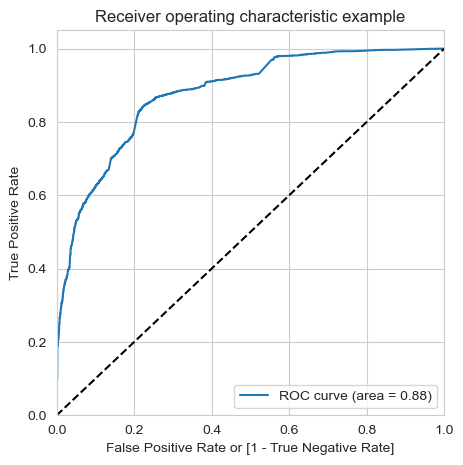

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.077818,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.012979,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.248046,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.199278,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.731550,3241,1,1,1,1,1,1,1,1,1,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.629263  0.979819  0.412961
0.2   0.2  0.737545  0.891680  0.642440
0.3   0.3  0.797265  0.850082  0.764676
0.4   0.4  0.801666  0.818369  0.791360
0.5   0.5  0.793022  0.656919  0.877001
0.6   0.6  0.795380  0.578254  0.929352
0.7   0.7  0.785950  0.514827  0.953240
0.8   0.8  0.751218  0.397035  0.969759
0.9   0.9  0.713500  0.261120  0.992630


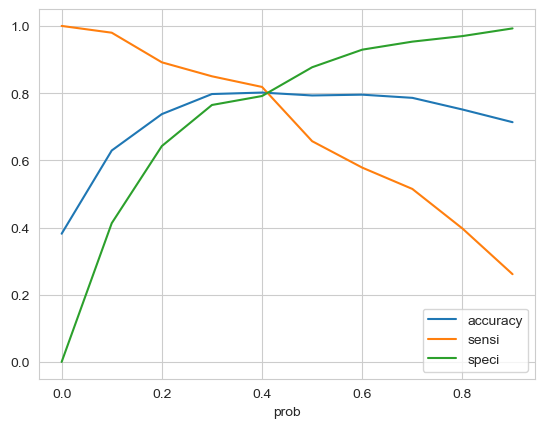

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(10)

,Converted,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.077818,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.012979,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.248046,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.199278,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.731550,3241,1,1,1,1,1,1,1,1,1,0,0,1
5,0,0.058146,5738,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0.066669,7366,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0.066823,3680,0,1,0,0,0,0,0,0,0,0,0,0
8,1,0.718924,4170,1,1,1,1,1,1,1,1,1,0,0,1
9,0,0.074973,43,0,1,0,0,0,0,0,0,0,0,0,0


In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8016658808738016

In [130]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3114,  821],
       [ 441, 1987]], dtype=int64)

In [131]:
# Actual/Predicted     not_converted    converted
        # not_converted        3114      821
        # converted            441       1987 

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8183690280065898

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.7913595933926303

In [135]:
# Calculate false postive rate - predicting converted when customer is not-converted
print(FP/ float(TN+FP))

0.20864040660736977


In [136]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7076210826210826


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8759493670886076


 - now we have a high sensitivity which mathes the model's requirement

## Precision and Recall

In [138]:
#Looking at the confusion matrix again

In [139]:
# 'confusion' is the first confusion matrix when cut off value was 0.5 probability
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3451,  484],
       [ 833, 1595]], dtype=int64)

##### Precision
TP / TP + FP

In [140]:
confusion[1,1]/(confusion[0,1]+confusion[1,1]) # Precision at 0.5 threashold

0.7671957671957672

In [141]:
confusion2[1,1]/(confusion[0,1]+confusion[1,1]) # Precision at 0.4 threashold

0.9557479557479558

##### Recall
TP / TP + FN

In [142]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])  # Recall at 0.5 threashold

0.6569192751235585

In [143]:
confusion2[1,1]/(confusion[1,0]+confusion[1,1]) # Recall at 0.3 threashold

0.8183690280065898

Using sklearn utilities for the same

In [144]:
from sklearn.metrics import precision_score, recall_score

In [145]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7671957671957672

In [146]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6569192751235585

### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    0
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

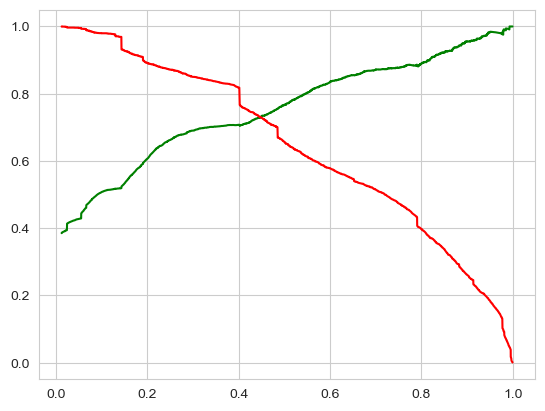

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [151]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [152]:
# recall that - col = X_train.columns[rfe.support_] and then subsequently removed colums based on p value and VIFs
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Welingak website', 'Specialization_Hospitality Management',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_What_matters_more_missing',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed'],
      dtype='object')

In [153]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Welingak website,Specialization_Hospitality Management,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,What is your current occupation_Working Professional,What matters most to you in choosing a course_What_matters_more_missing,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed
6906,0,1.919395,0,0,0,1,0,0,0,0,0,1,0
1873,0,-0.546142,0,0,0,0,0,0,0,0,0,1,0
771,0,-0.797465,0,0,0,0,0,0,0,0,0,0,0
4495,0,-0.623190,0,0,0,0,0,0,0,0,0,0,0
9061,0,2.392690,0,0,0,0,0,0,1,0,0,0,0


In [154]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [155]:
# recall we predicted for the train set using the same formula - y_train_pred = res.predict(X_train_sm)
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

6906    0.971556
1873    0.467310
771     0.152466
4495    0.170998
9061    0.436024
4929    0.455806
2308    0.090566
1034    0.146066
9033    0.501280
7008    0.871001
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred) # predicted y values of test data

In [158]:
# Let's see the head
y_pred_1.head()

,0
6906,0.971556
1873,0.467310
771,0.152466
4495,0.170998
9061,0.436024


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test) # actual y values of test data

In [160]:
y_test_df.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [161]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,CustID,0
0,1,6906,0.971556
1,0,1873,0.467310
2,0,771,0.152466
3,0,4495,0.170998
4,1,9061,0.436024


In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [166]:
y_pred_final.head()

,Converted,CustID,Convert_Prob
0,1,6906,0.971556
1,0,1873,0.467310
2,0,771,0.152466
3,0,4495,0.170998
4,1,9061,0.436024


In [167]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Convert_Prob'], axis = 1)

In [168]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(columns = ['CustID','Converted','Convert_Prob'], axis=1)

In [169]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Convert_Prob
0,6906,1,0.971556
1,1873,0,0.467310
2,771,0,0.152466
3,4495,0,0.170998
4,9061,1,0.436024


In [170]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0) # we can adjust to 0.3 if we want

In [171]:
y_pred_final.head()

,CustID,Converted,Convert_Prob,final_predicted
0,6906,1,0.971556,1
1,1873,0,0.467310,1
2,771,0,0.152466,0
3,4495,0,0.170998,0
4,9061,1,0.436024,1


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7862119545287862

In [173]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1354,  306],
       [ 277,  790]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7403936269915652

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.8156626506024096

Conclusion - we have a moded with high accuracy and sensitivity which matches our requirement.

The variables that are most important in making a prediction are


- Do Not Email	
- Total Time Spent on Website	
- Lead Source_Welingak website	
- Specialization_Hospitality Management
- Lead Profile_Lateral Student
- Lead Profile_Potential Lead
- Lead Profile_Student of SomeSchool	
- What is your current occupation_Working Professional
- What matters most to you in choosing a course_What_matters_more_missing
- Last Activity_Had a Phone Conversation
- Last Activity_Olark Chat Conversation
- Last Activity_SMS Sent
- Last Activity_Unsubscribed